# Extended overview figures

This notebook creates the extended overview plots from the SI information of the publication.

In [1]:
import pickle
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import os

sys.path.append("../../")
sys.path.append("../../covid19_inference")
sys.path.append("../")

import covid19_soccer
from covid19_soccer.plot.utils import get_from_trace
#import covid19_inference as cov19
from header_plotting import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def load(fstr):
    with open(fstr, "rb") as f:
         return pickle.load(f)

countries = ['England', 'Czechia', 'Scotland', 'Spain', 'Germany', 'Austria',
       'France', 'Slovakia', 'Belgium', 'Italy', 'Portugal',
       'Netherlands']
traces, models, dls = [], [], []
for country in tqdm(countries):
    model = None
    fstr=lambda tune, draws, max_treedepth: (f"/data.nst/smohr/covid19_soccer_data/main_traces/run"+
        f"-beta=False"+
        f"-country={country}"+
        f"-offset_data=0"+
        f"-prior_delay=-1"+
        f"-median_width_delay=1.0"+
        f"-interval_cps=10.0"+
        f"-f_fem=0.33"+
        f"-len=normal"+
        f"-abs_sine=False"+
        f"-t={tune}"+
        f"-d={draws}"+
        f"-max_treedepth={max_treedepth}.pkl")
    if os.path.exists(fstr(4000, 8000, 12)):
        try:
            model, trace = load(fstr(4000, 8000, 12))
            print(f"Use 8000 sample runs for {country}")
        except:
            pass
    if model is None and os.path.exists(fstr(2000, 4000, 12)):
        try:
            model, trace = load(fstr(2000, 4000, 12))
            print(f"Use 4000 sample runs for {country}")
        except:
            pass
    if model is None and os.path.exists(fstr(1000, 1500, 12)):
        try: 
            model, trace = load(fstr(1000, 1500, 12))
            print(f"Use 1500 sample runs for {country}")
        except:
            pass
    if model is None and os.path.exists(fstr(500, 1000, 12)):
        try: 
            model, trace = load(fstr(500, 1000, 12))
            print(f"Use 1000 sample runs for {country}")
        except:
            pass
    if model is None: 
        print(fstr(900, 800, 99), " not found")
        continue
    
    # Remove chains with likelihood larger than -200, should only be the case for 2 chains in France
    mask = (np.mean(trace.sample_stats.lp, axis=1)>-200)
    trace.posterior = trace.posterior.sel(chain=~mask)
    
    dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])
    models.append(model)
    traces.append(trace)
    dls.append(dl)

  0%|          | 0/12 [00:00<?, ?it/s]

Use 4000 sample runs for England


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Scotland


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Germany


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for France


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Spain


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Slovakia


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Portugal


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Netherlands


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Italy


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Czechia


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Belgium


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


Use 4000 sample runs for Austria


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded OxCGRT.csv.gz from /tmp/covid19_data/, skipping download.


/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


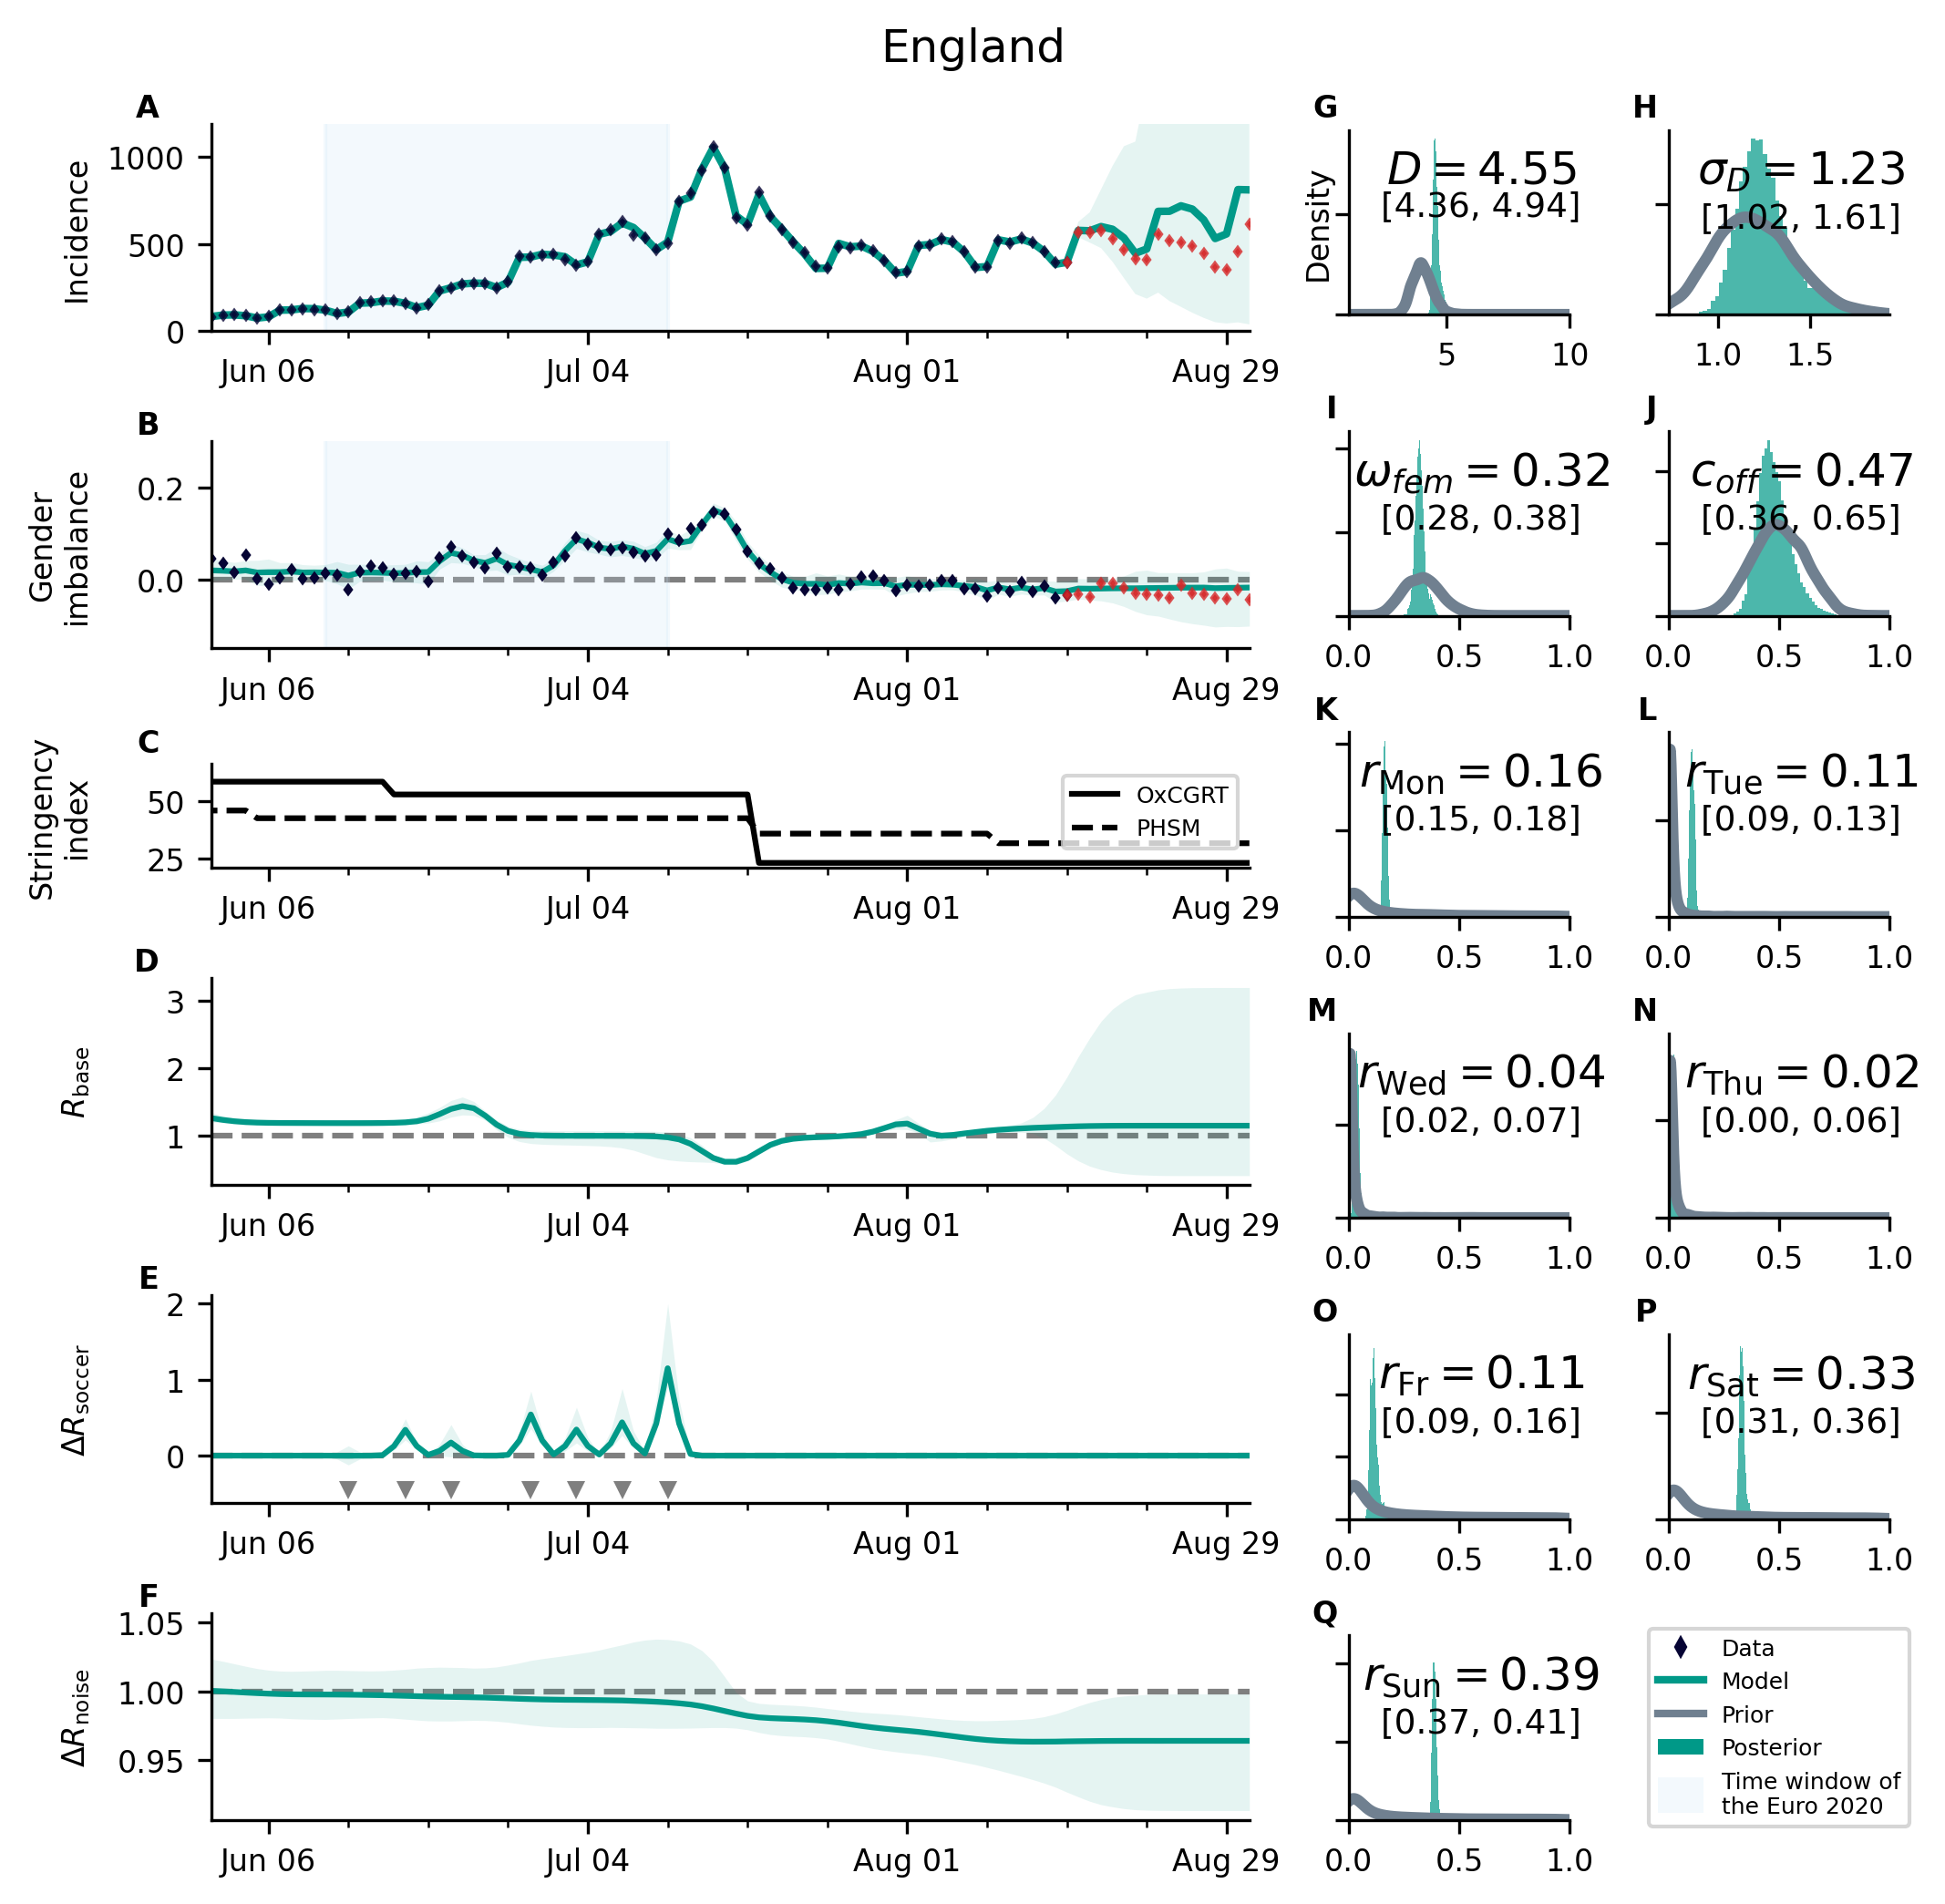

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


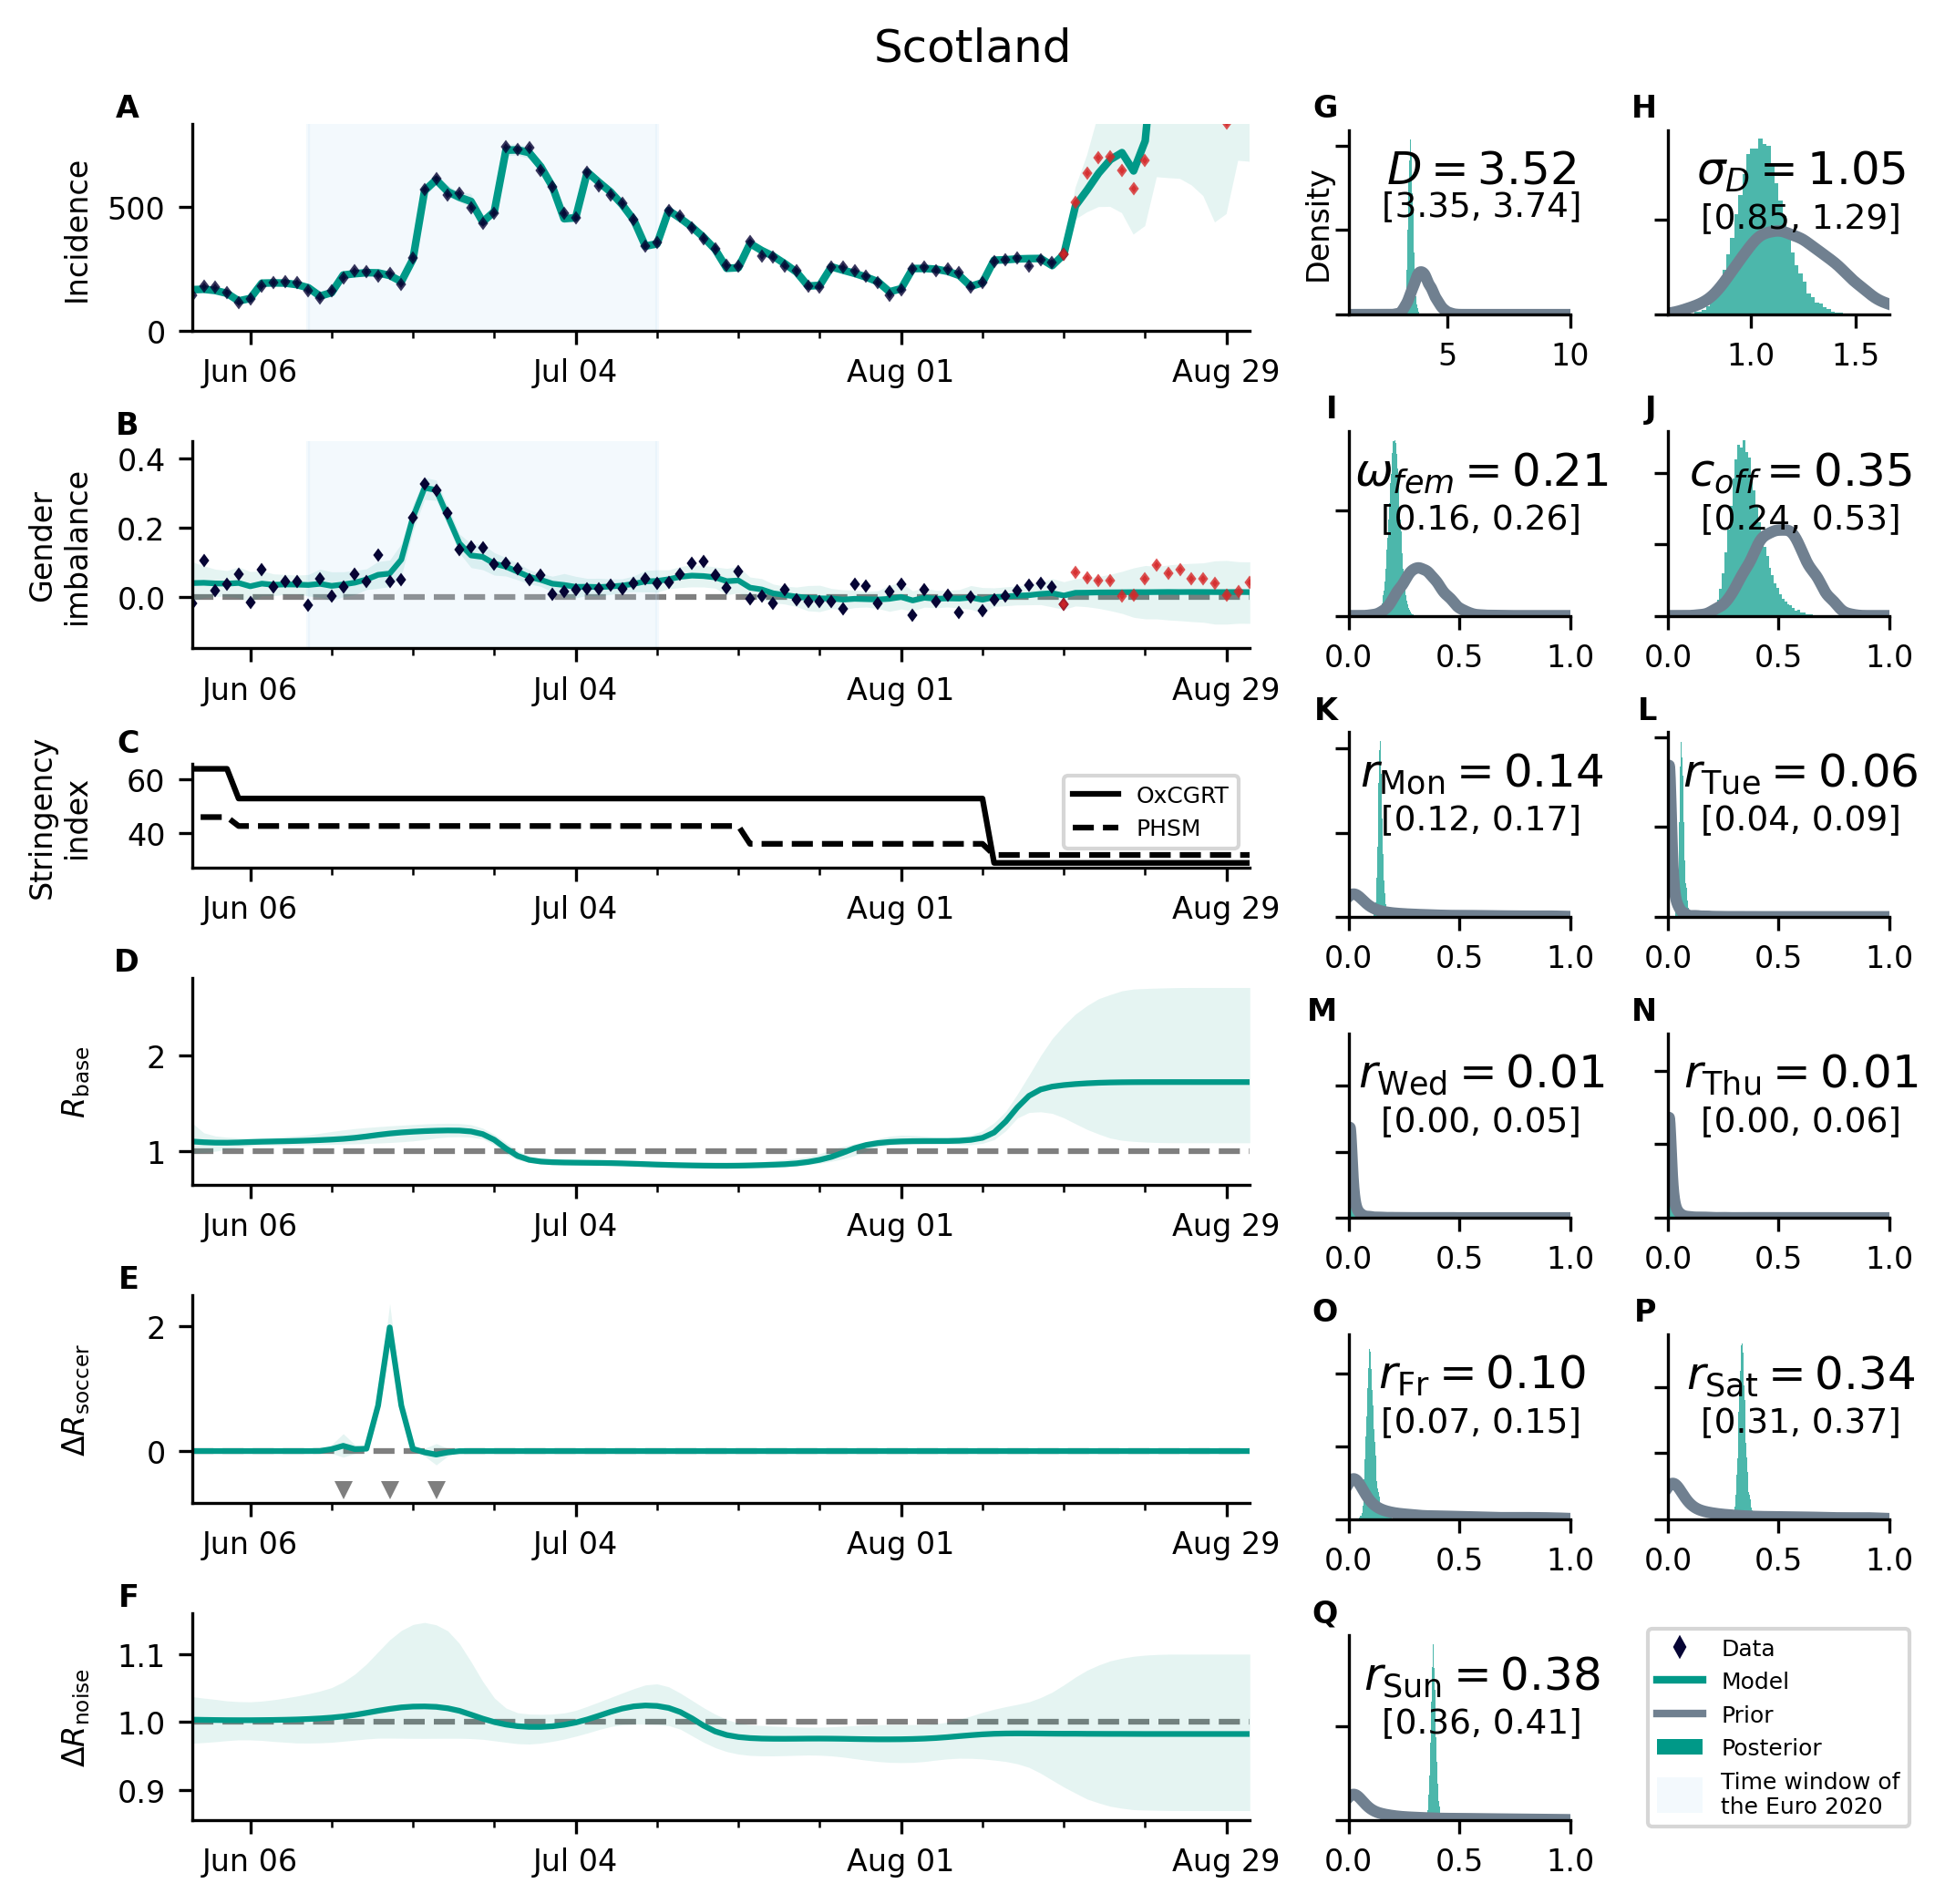

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


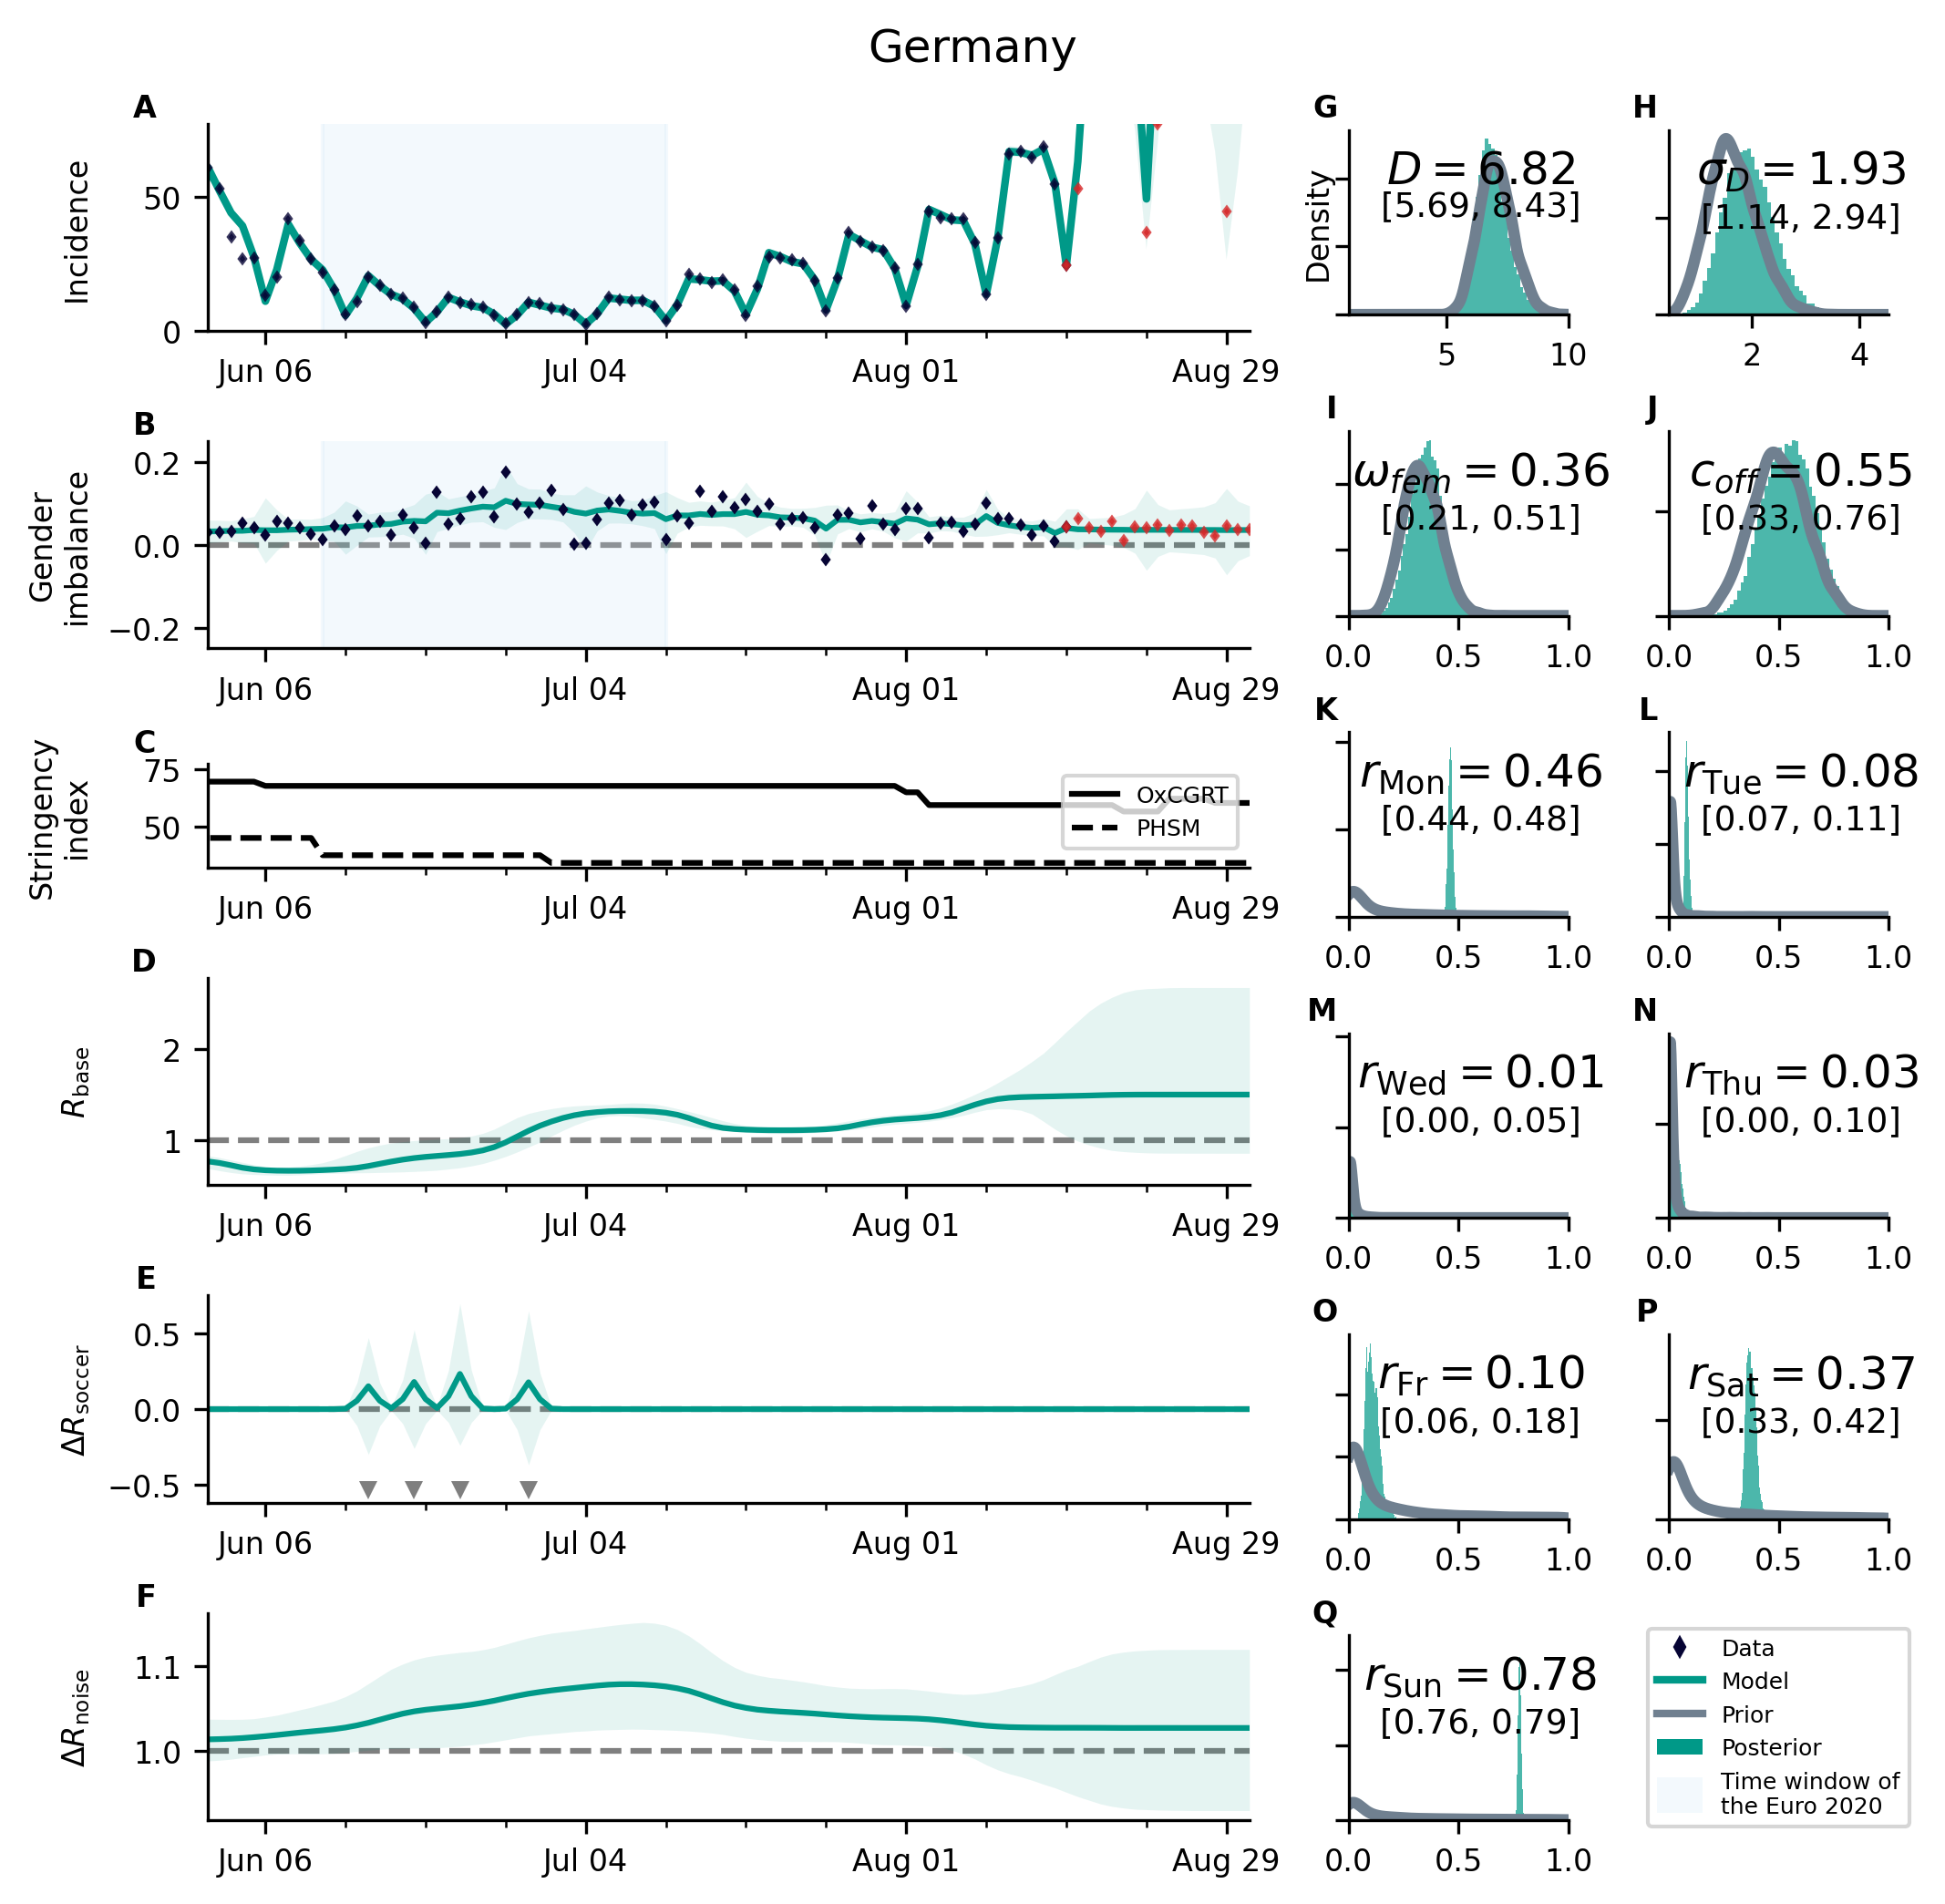

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


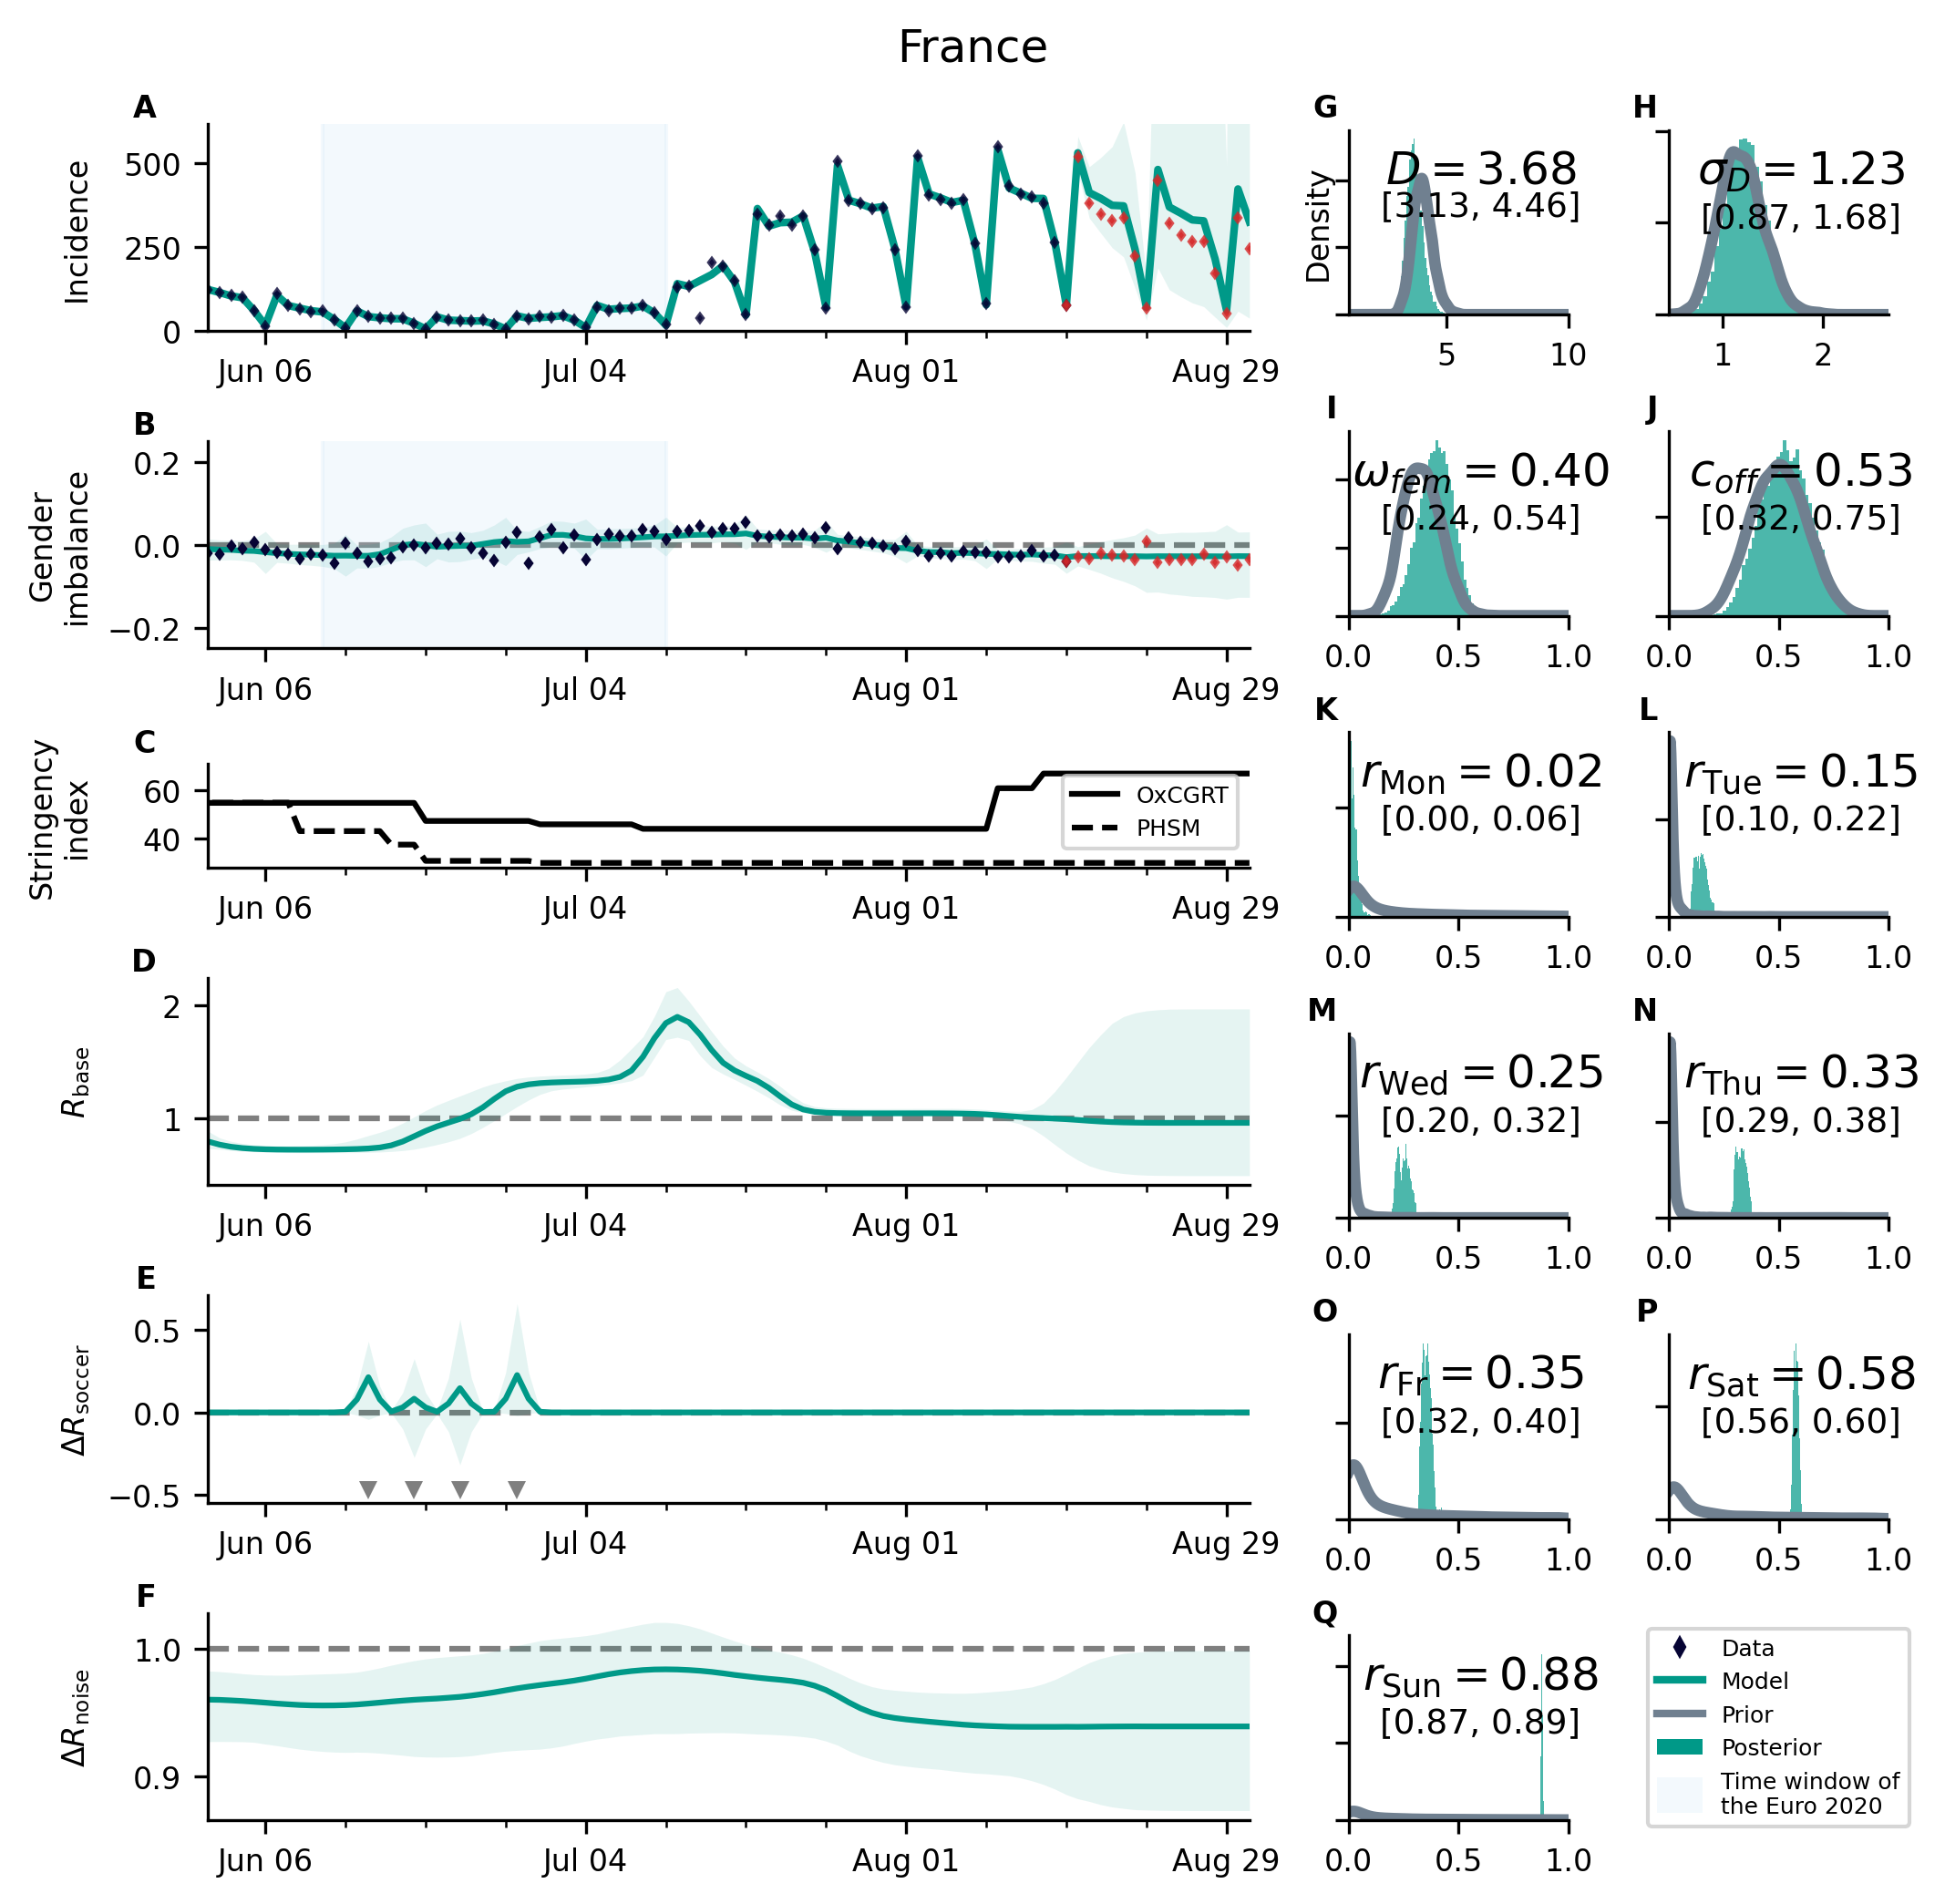

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


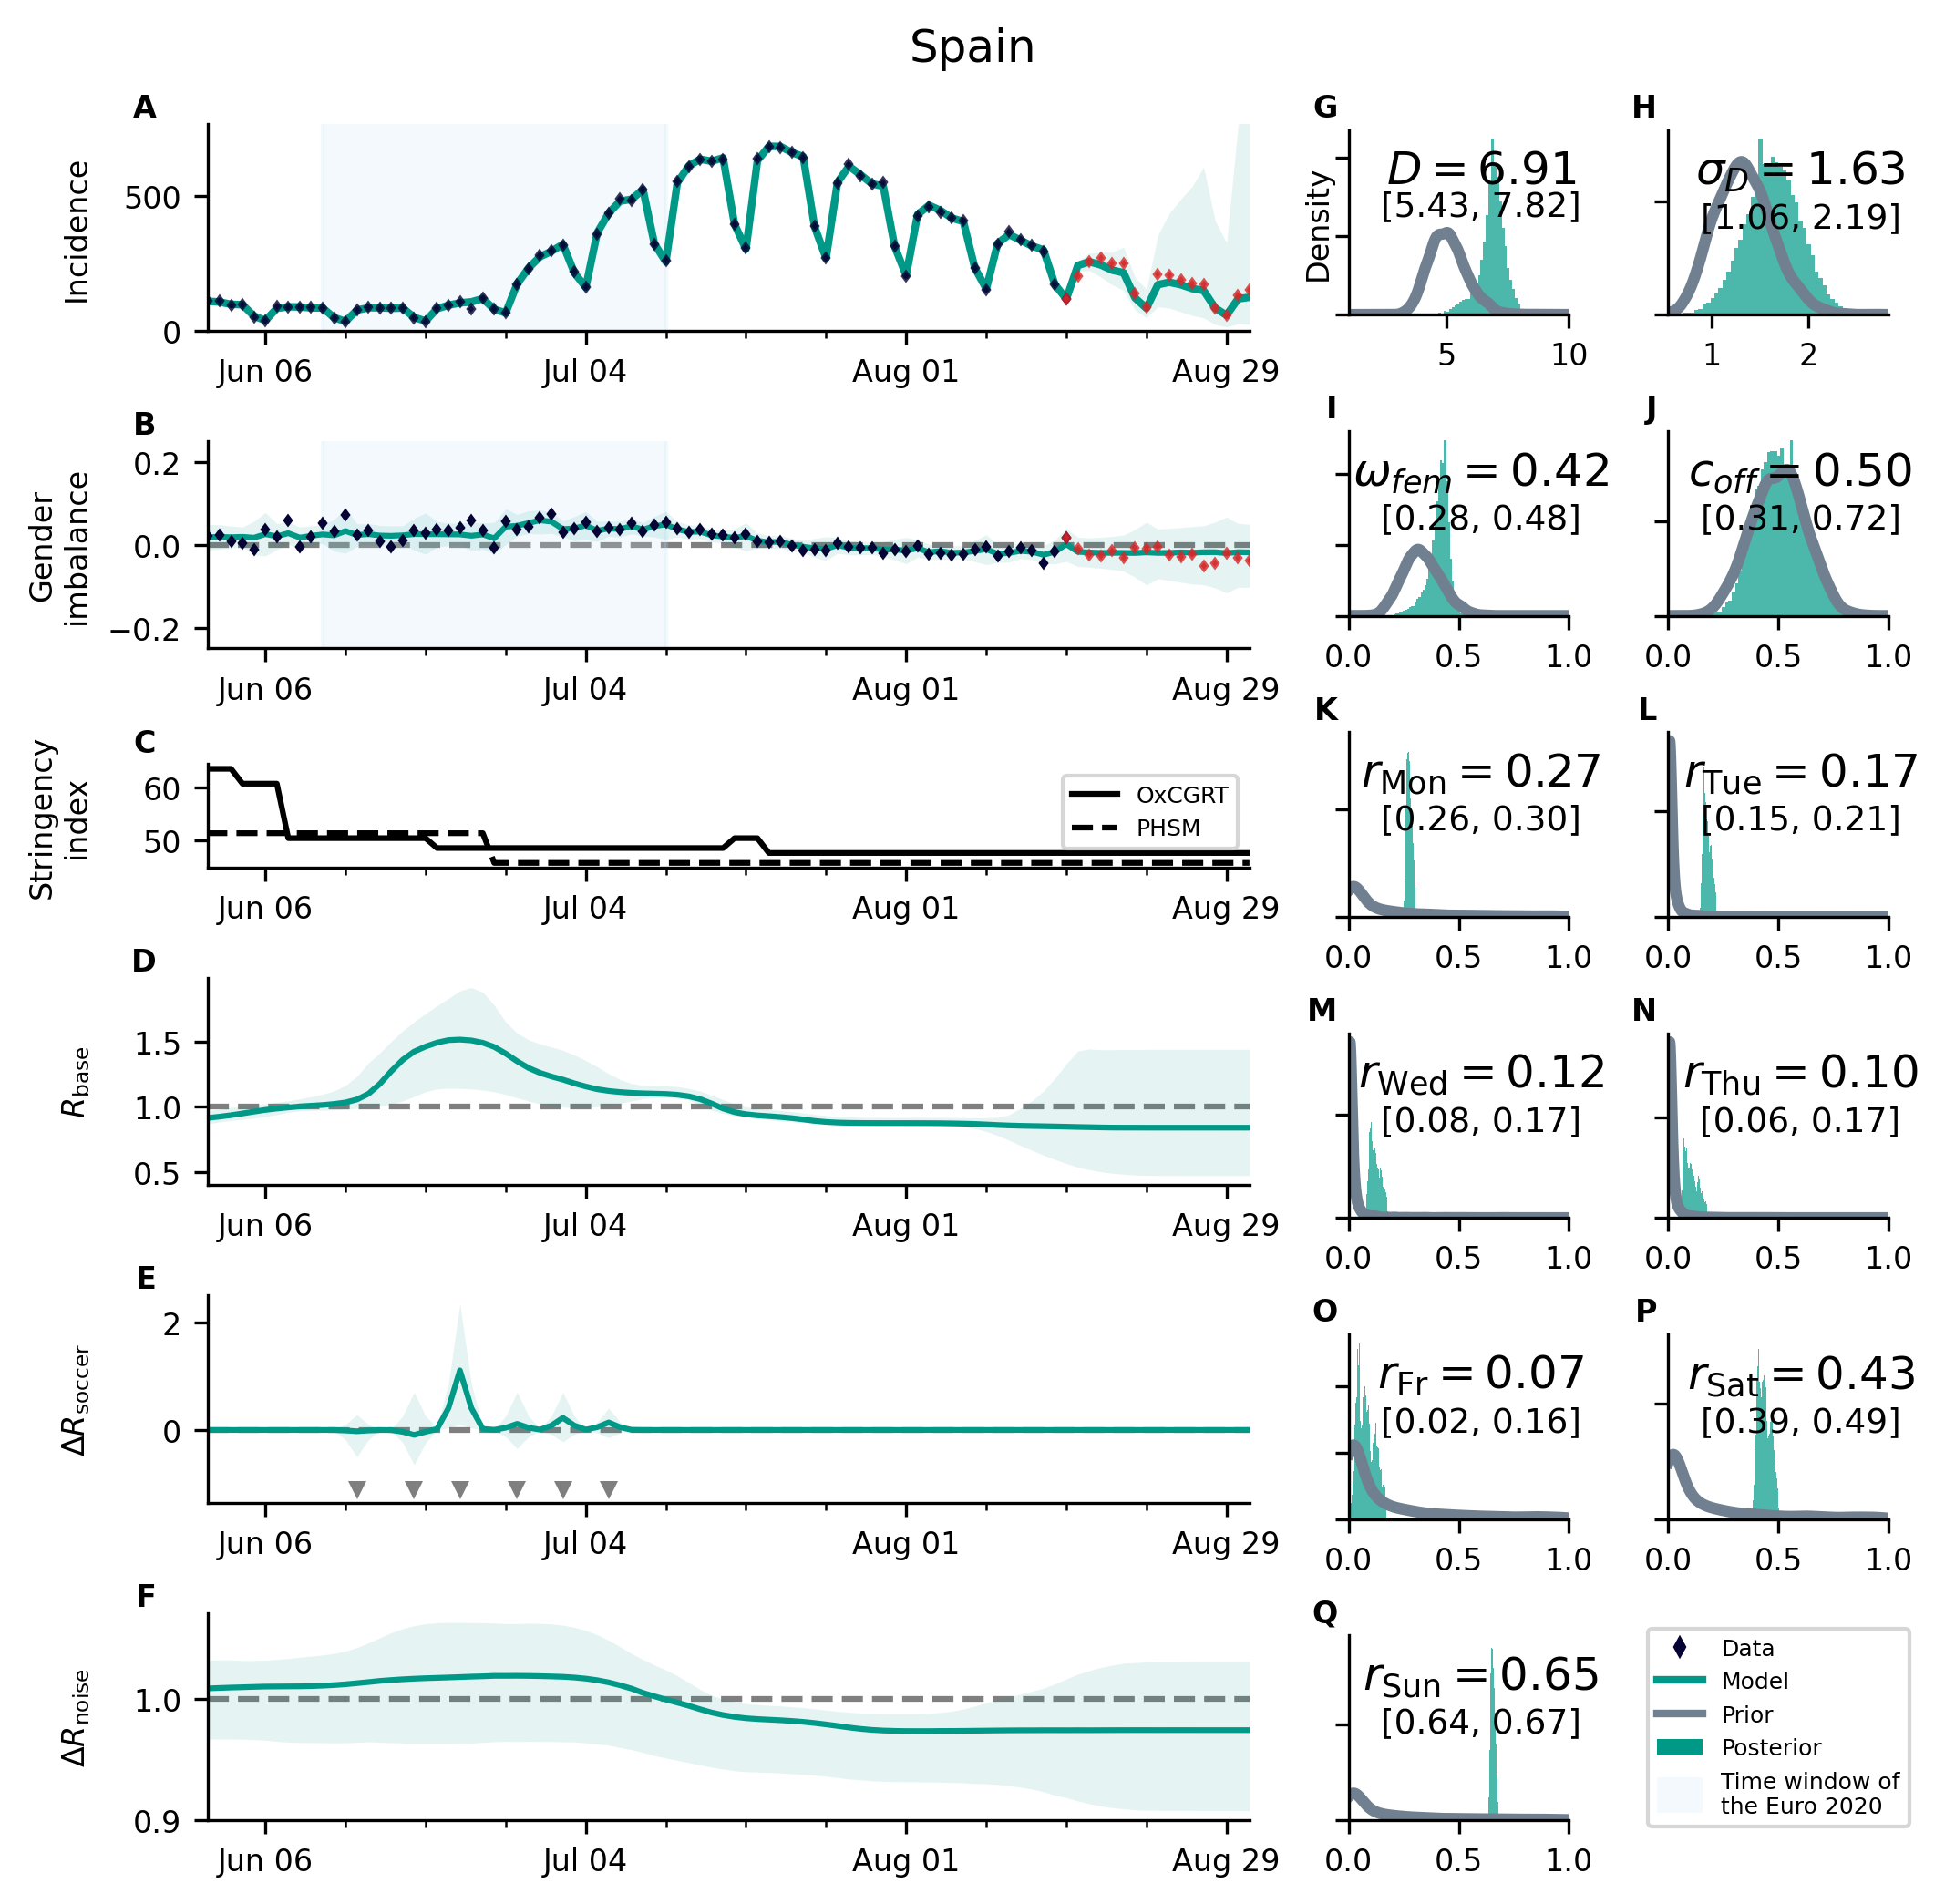

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


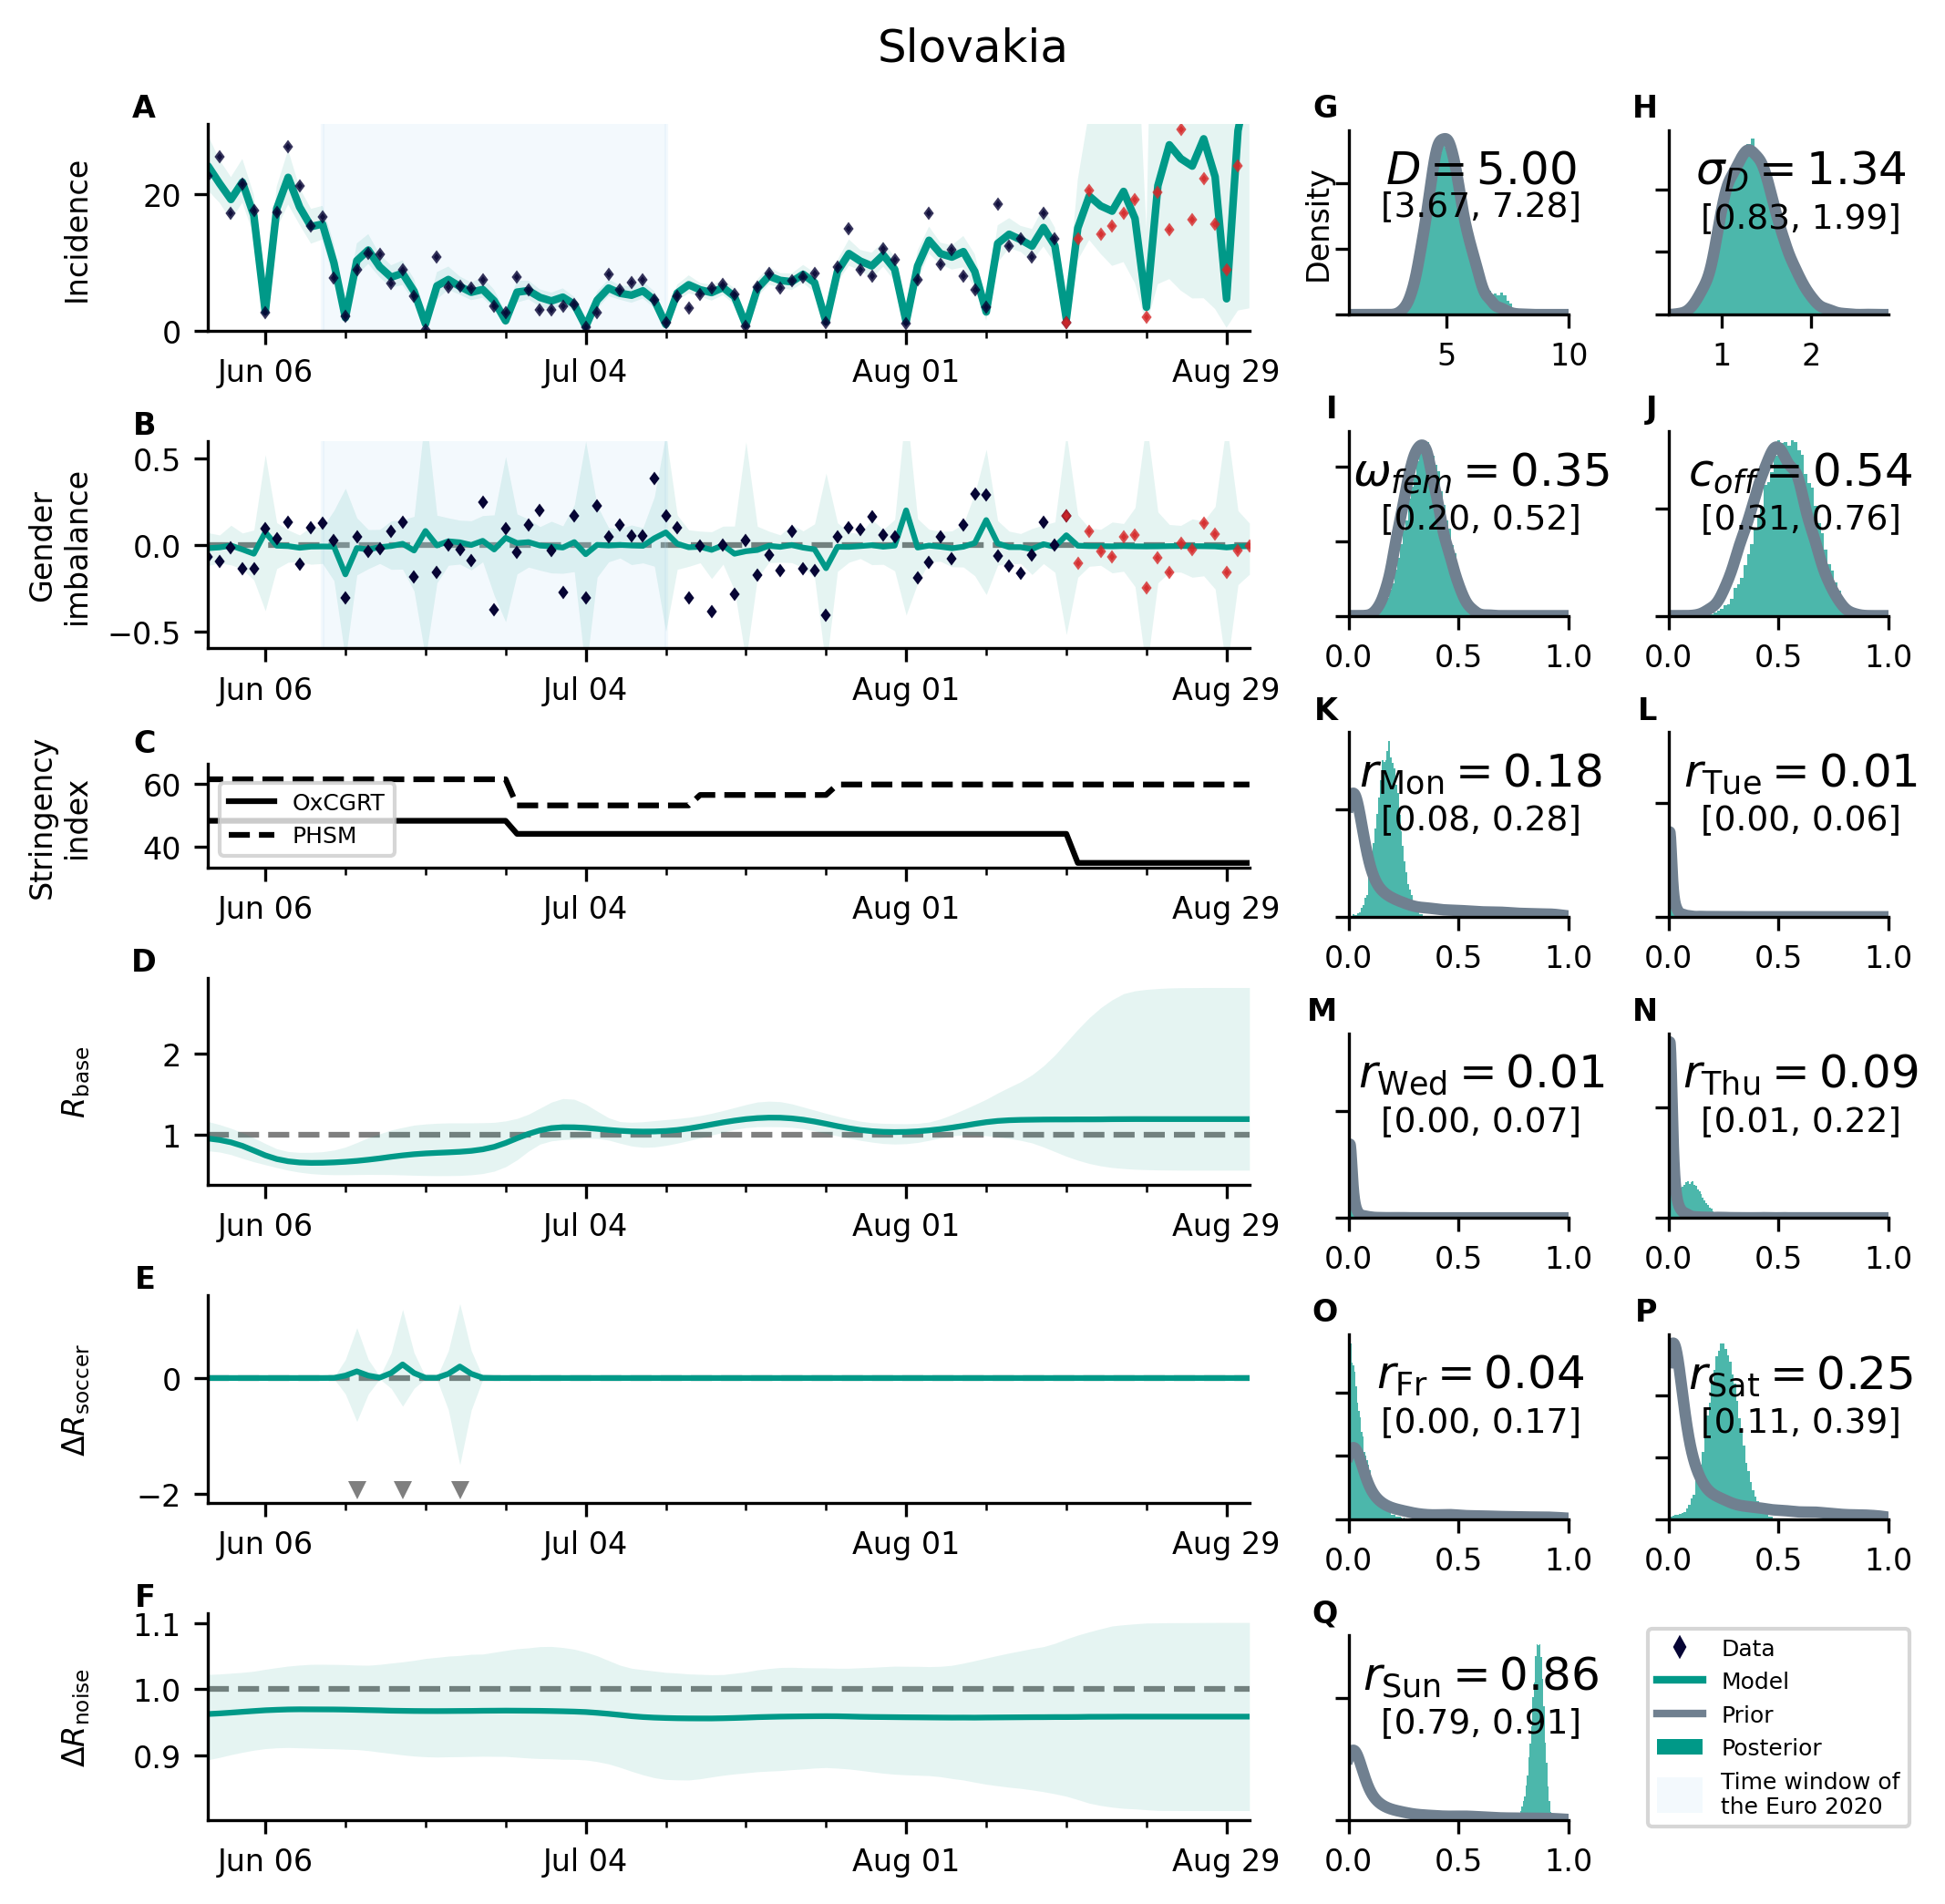

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


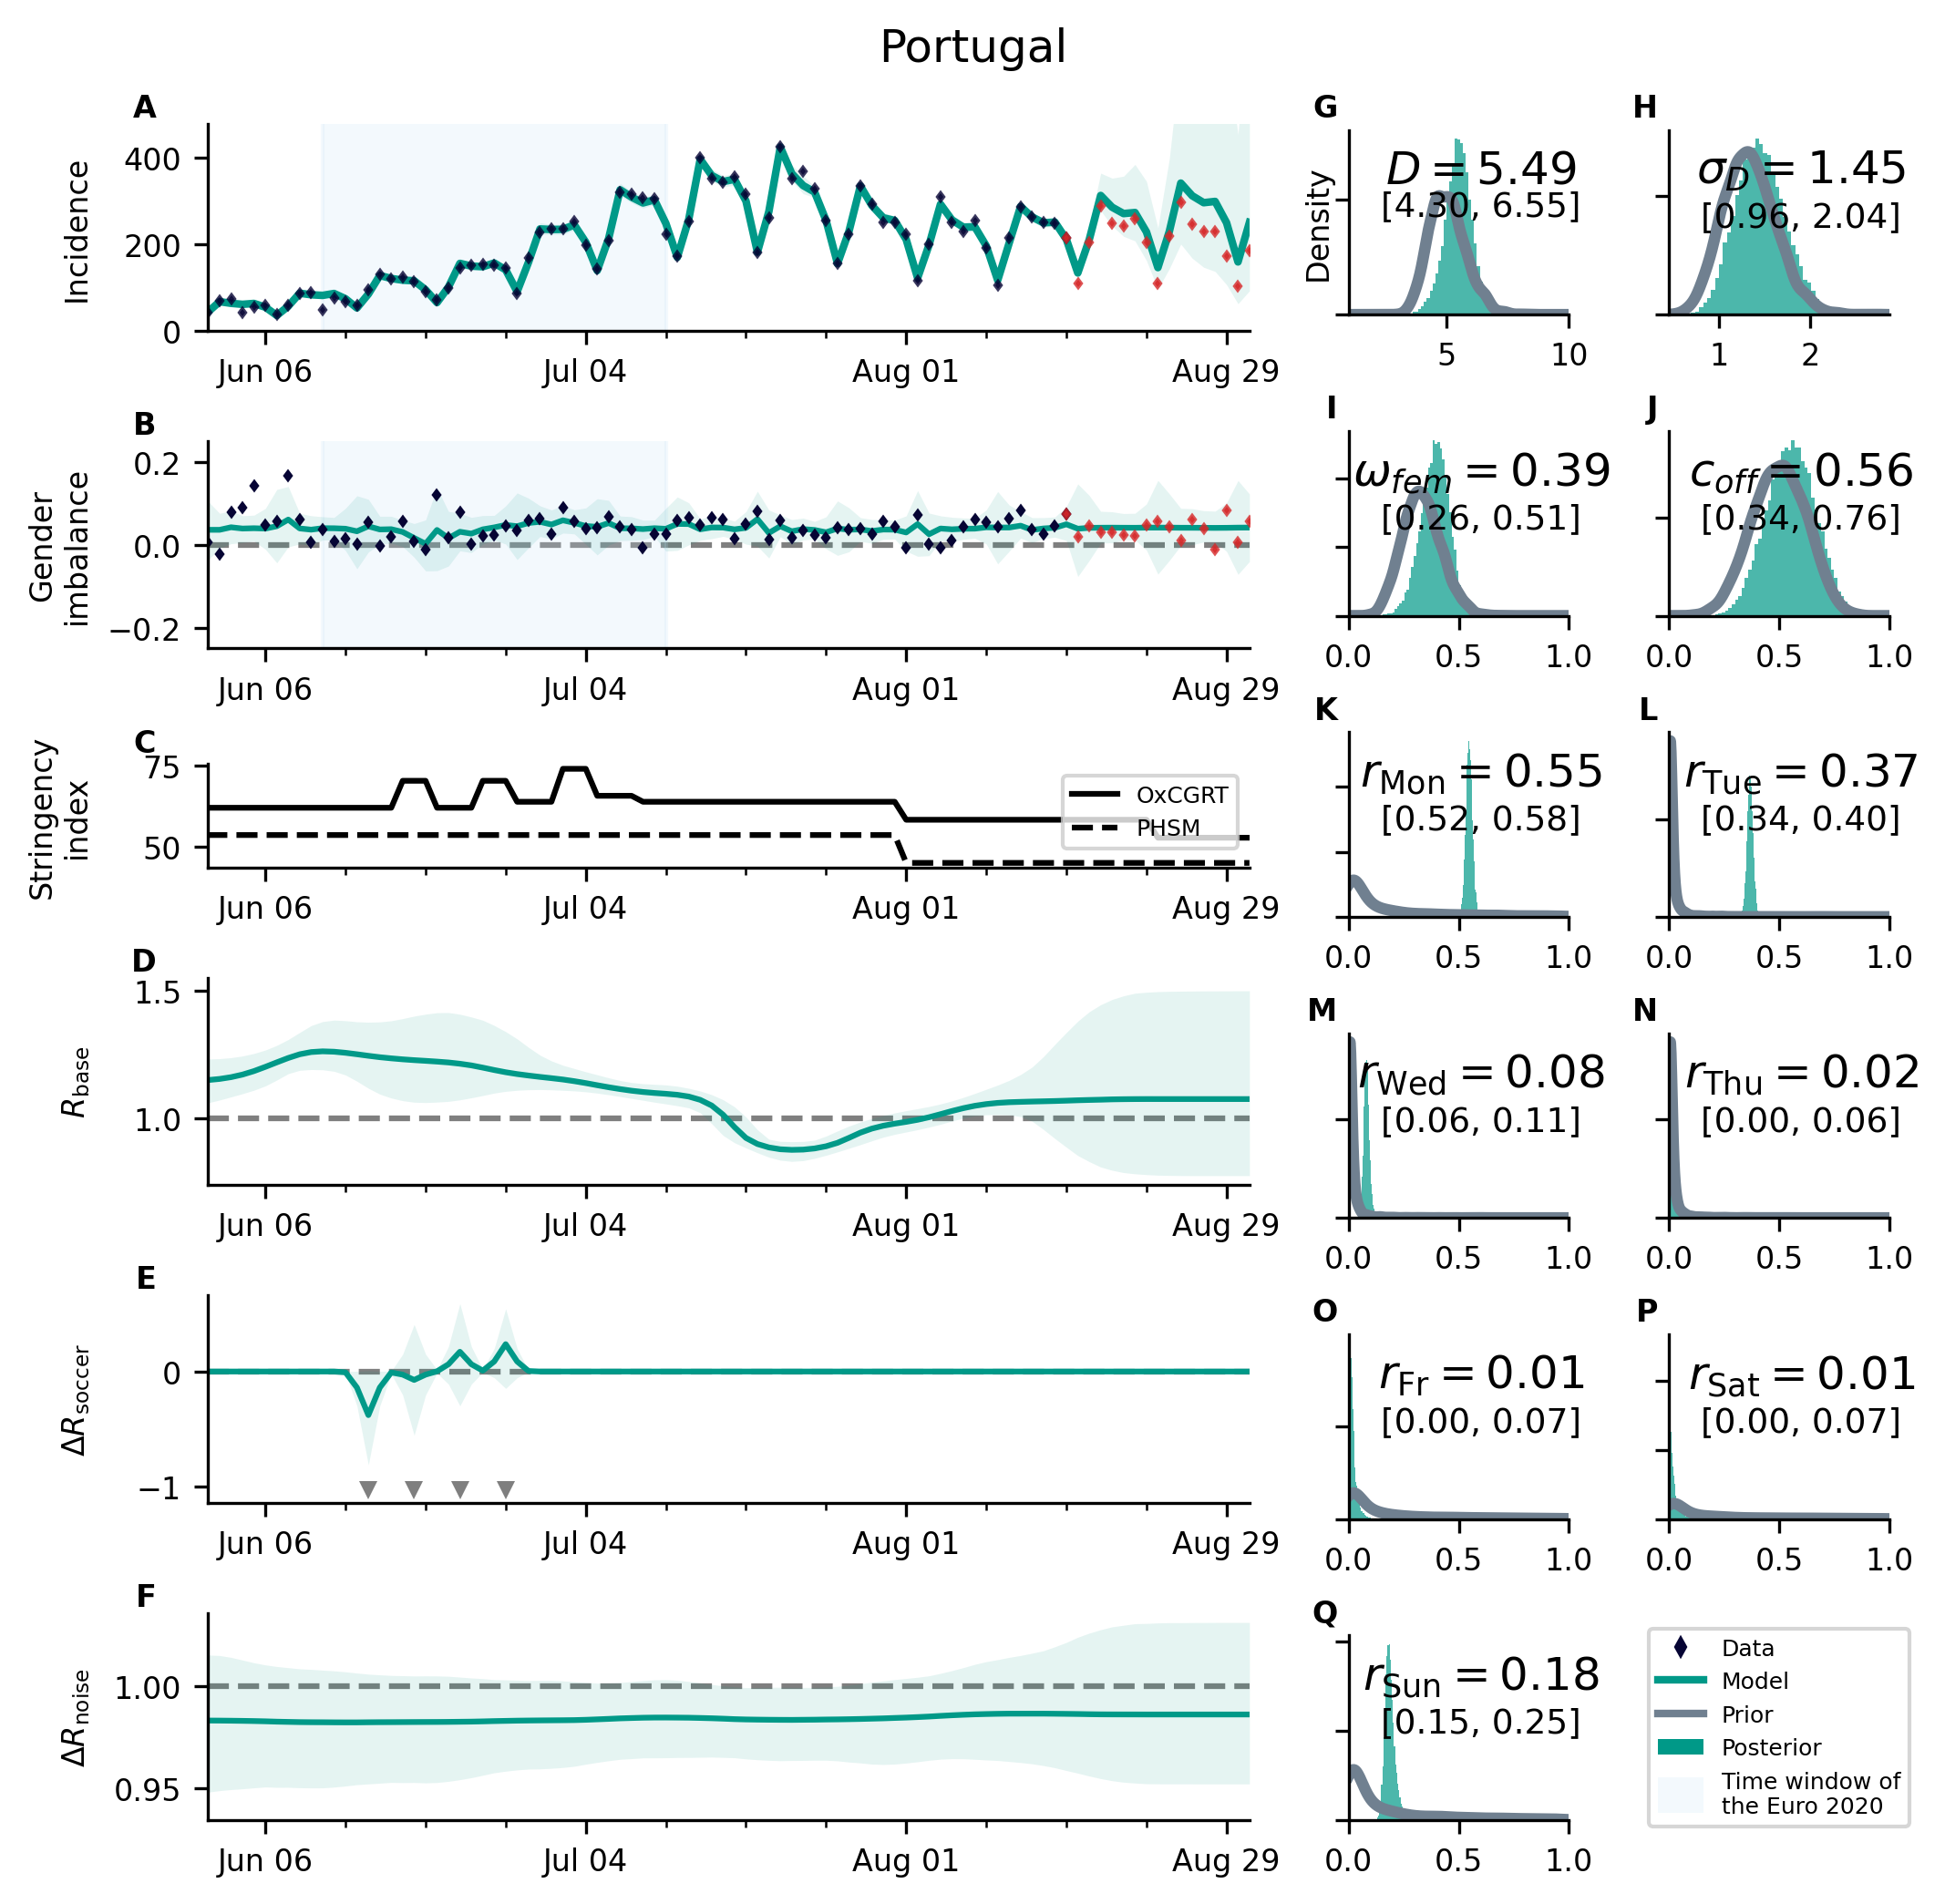

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


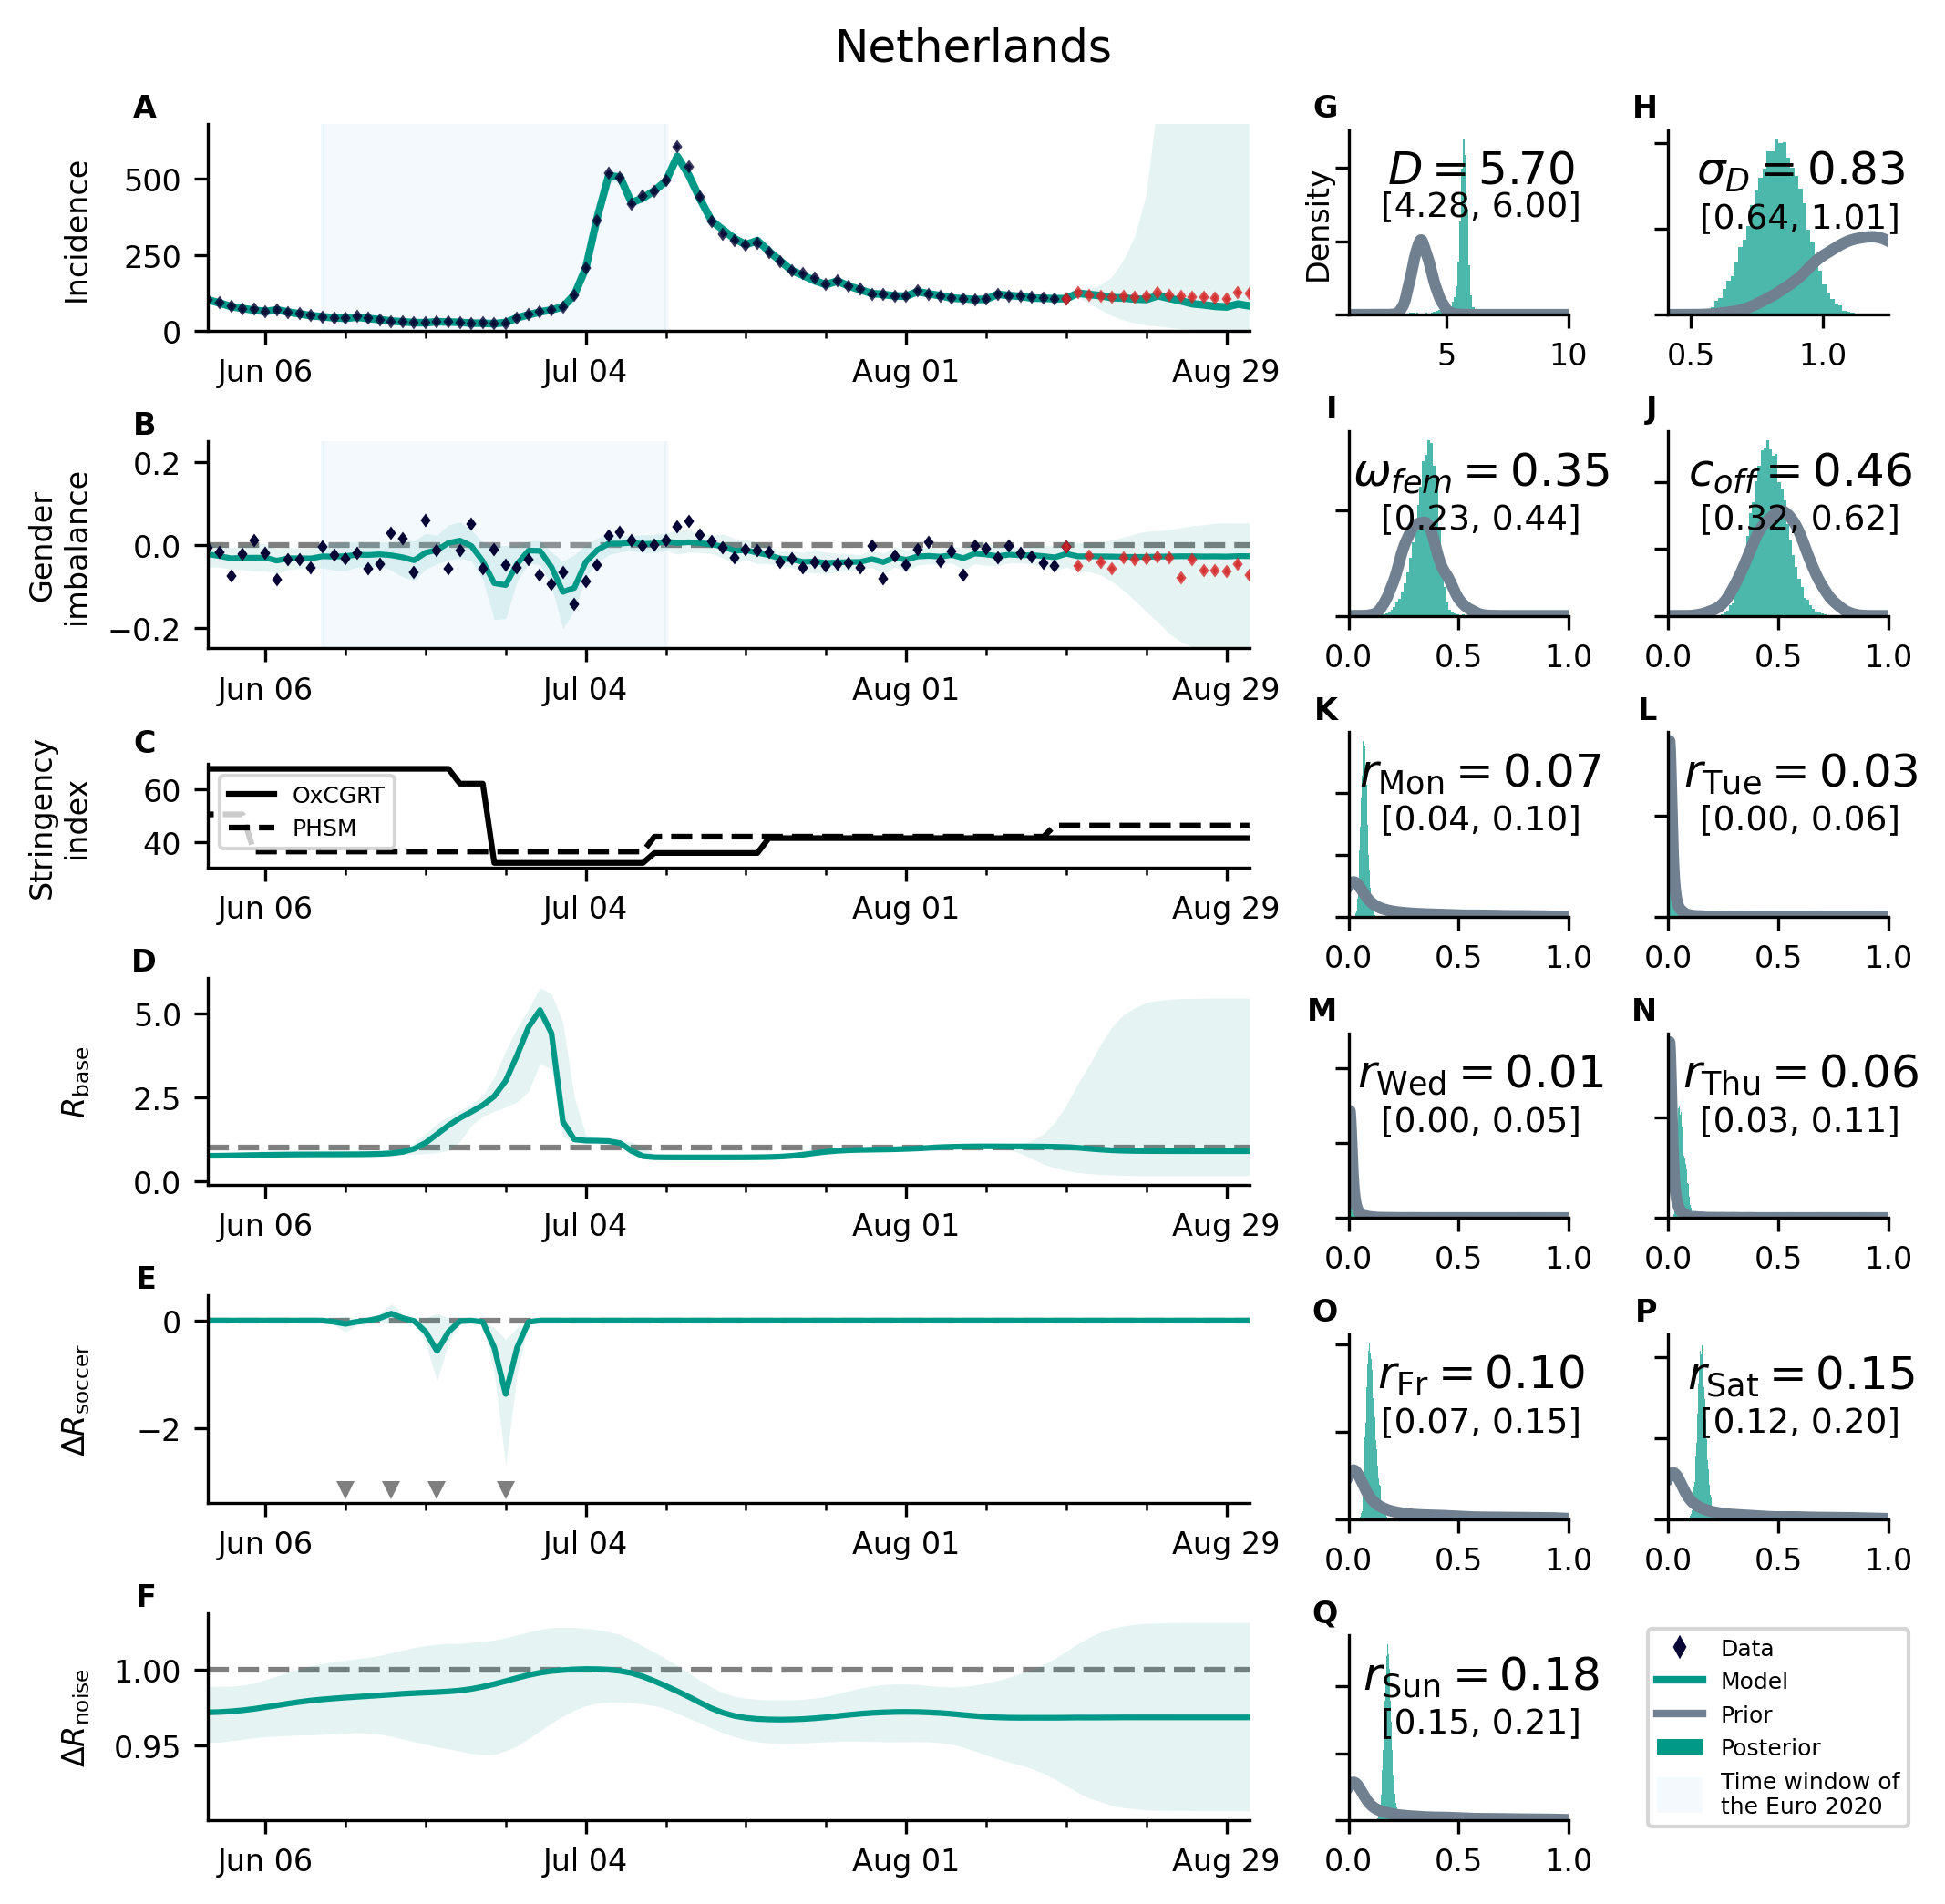

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/timeseries.py:148: RuntimeWarning: invalid value encountered in true_divide
  y=(
/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/timeseries.py:173: RuntimeWarning: invalid value encountered in true_divide
  imbalance = (
/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


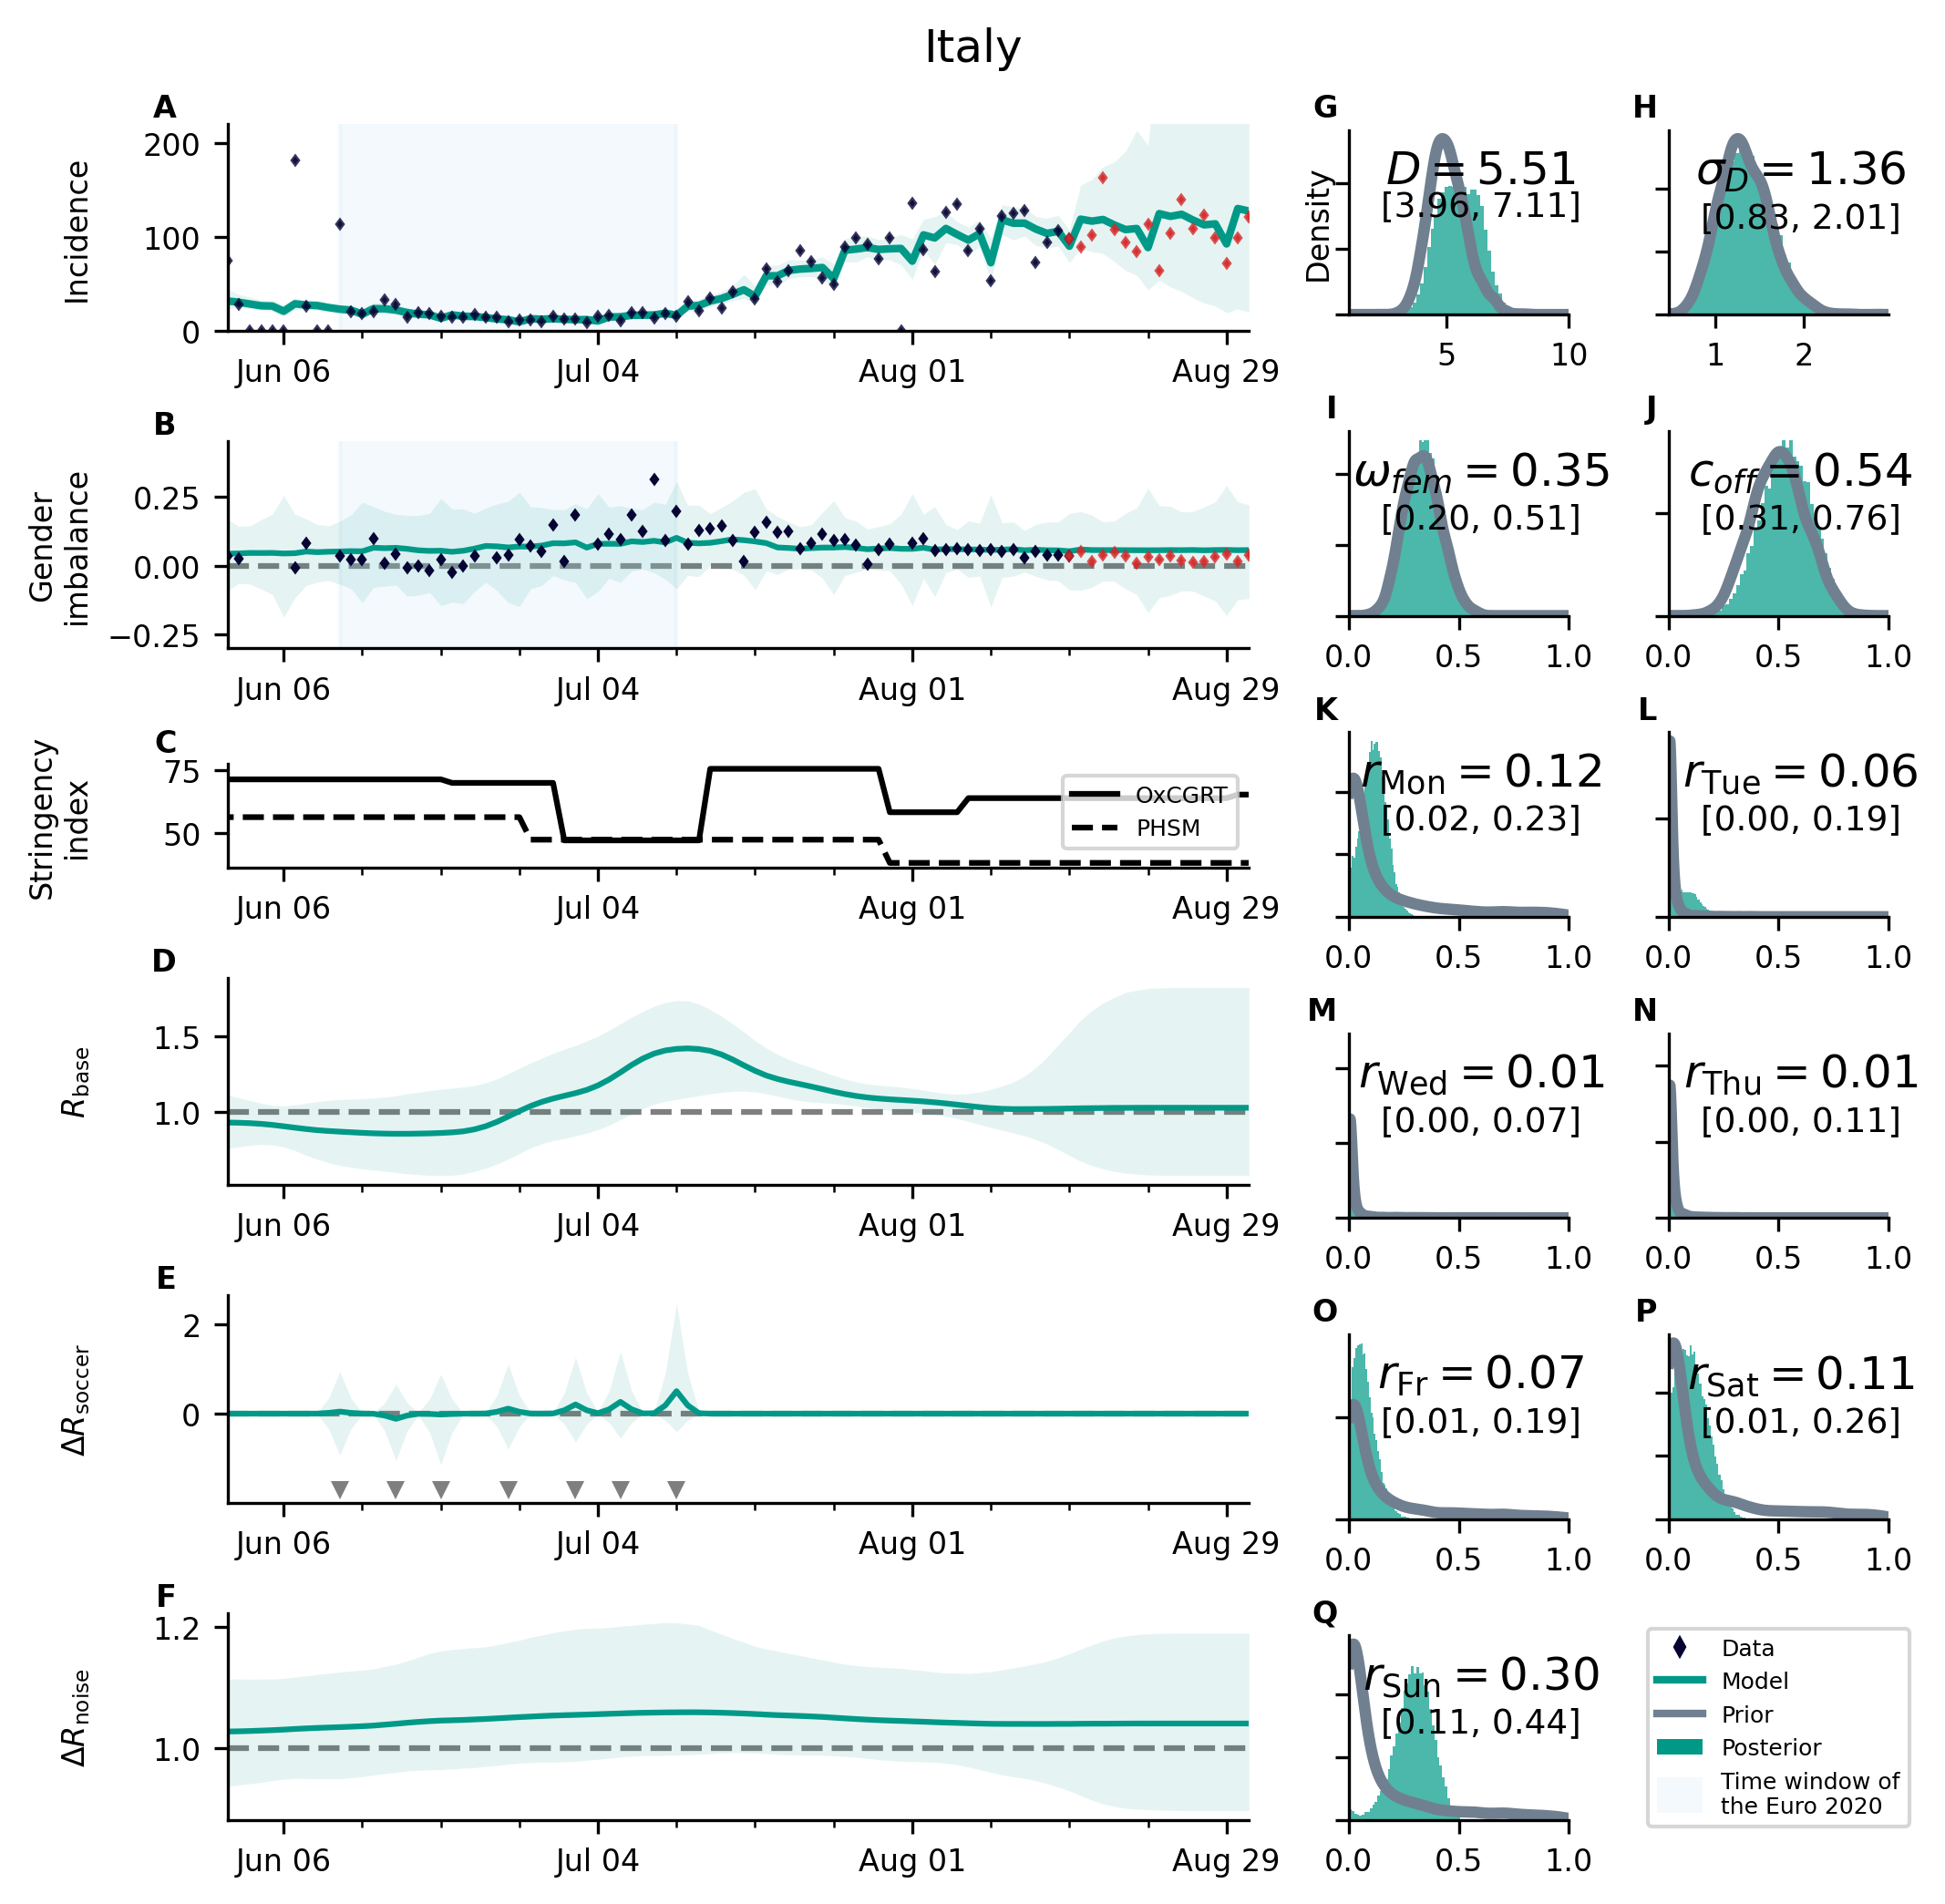

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


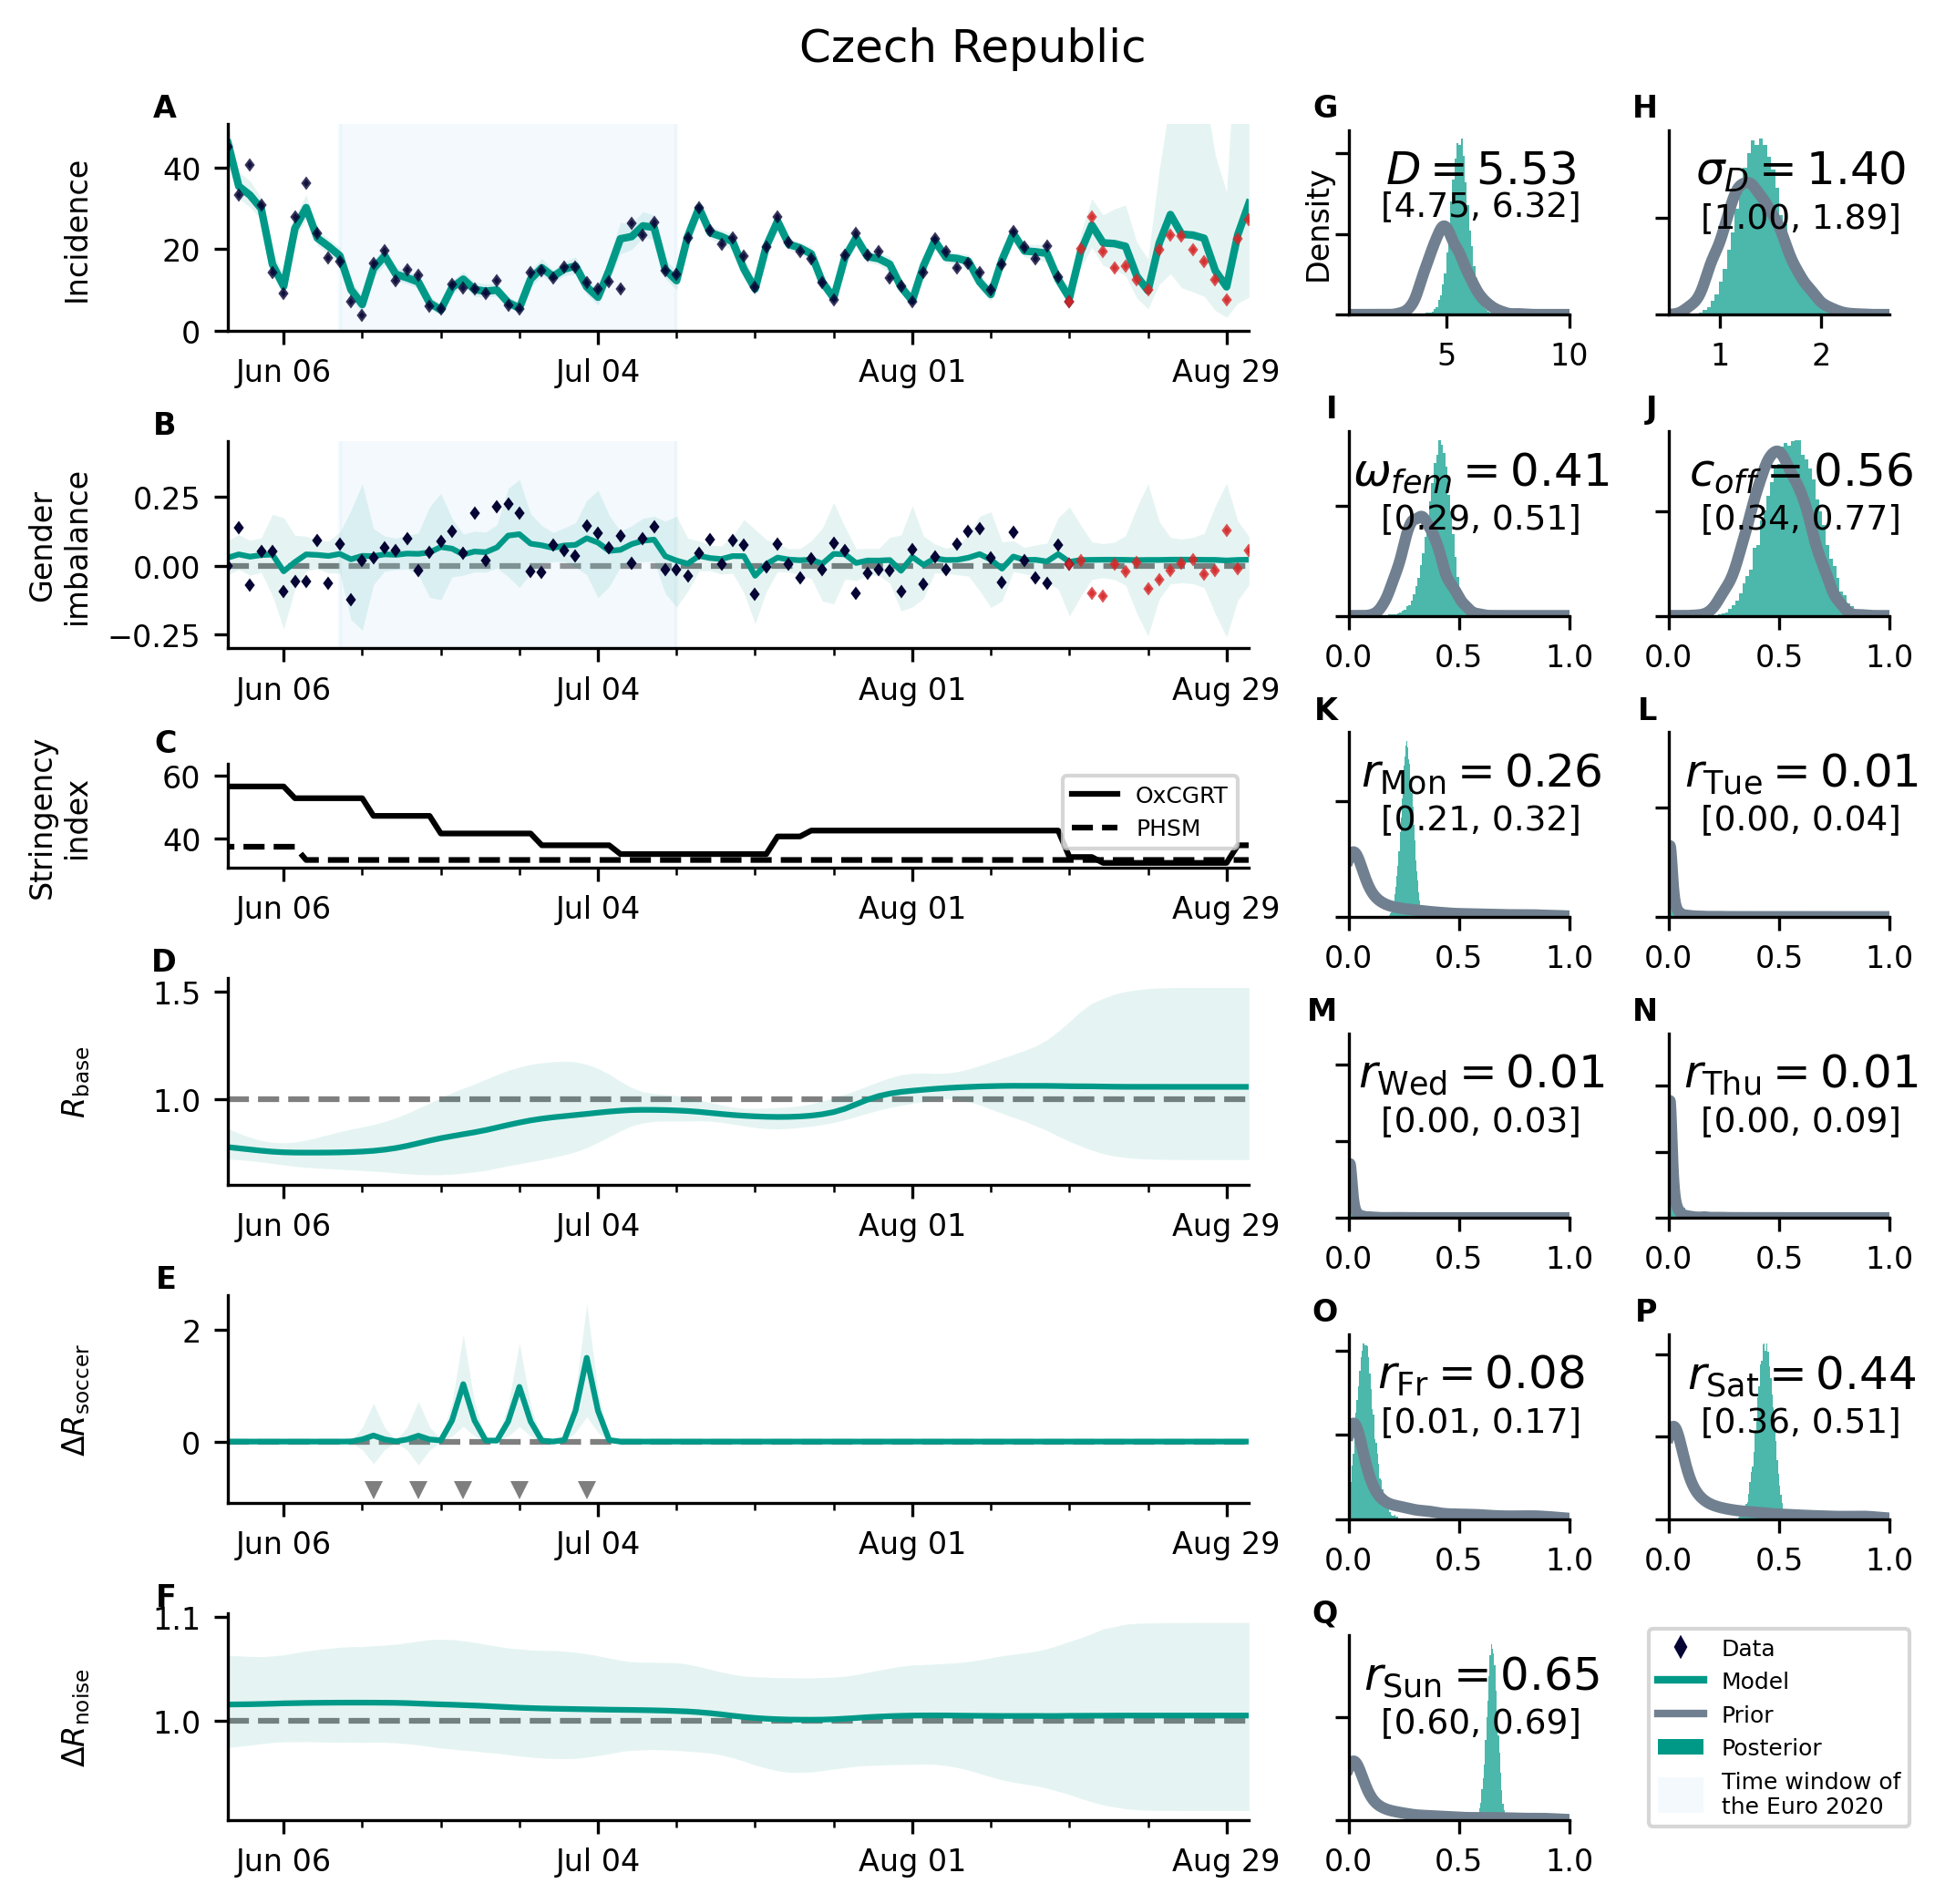

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


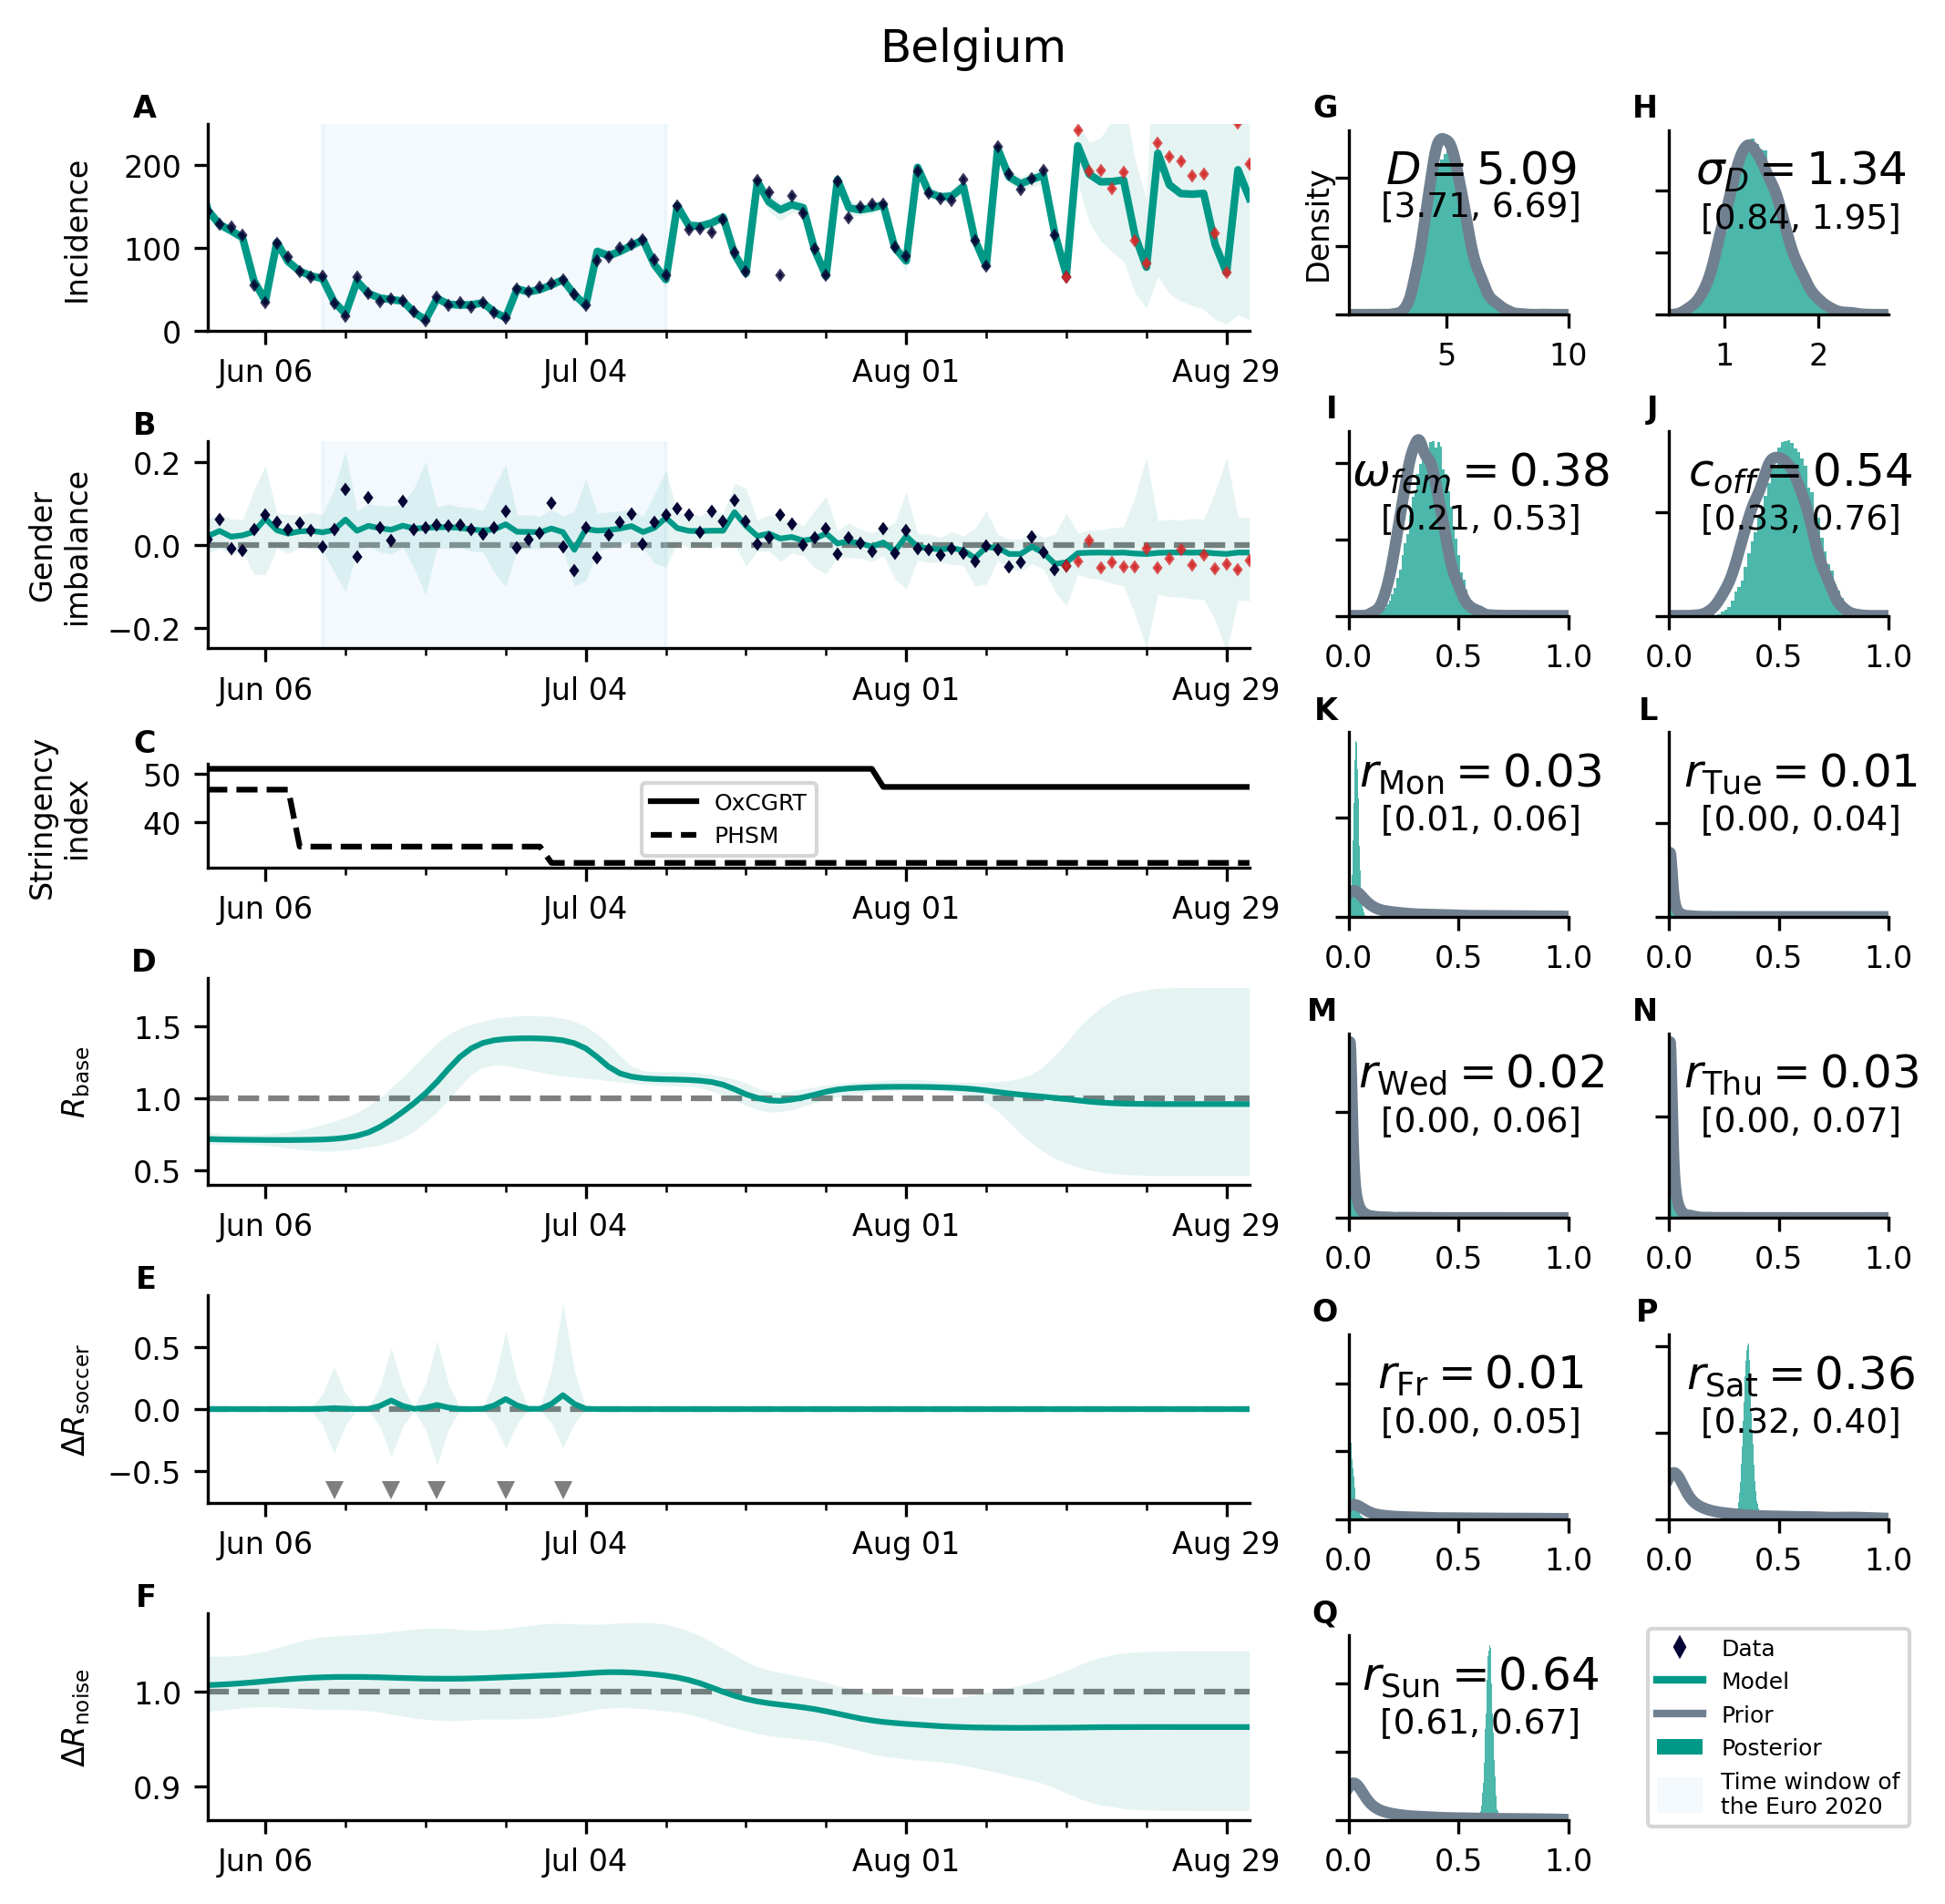

/home/smohr/Repositories/covid19_soccer/notebooks/supplementary/../../covid19_soccer/plot/other.py:925: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  lines.append(Patch([0], [0], color=rcParams.color_posterior, lw=0,),)


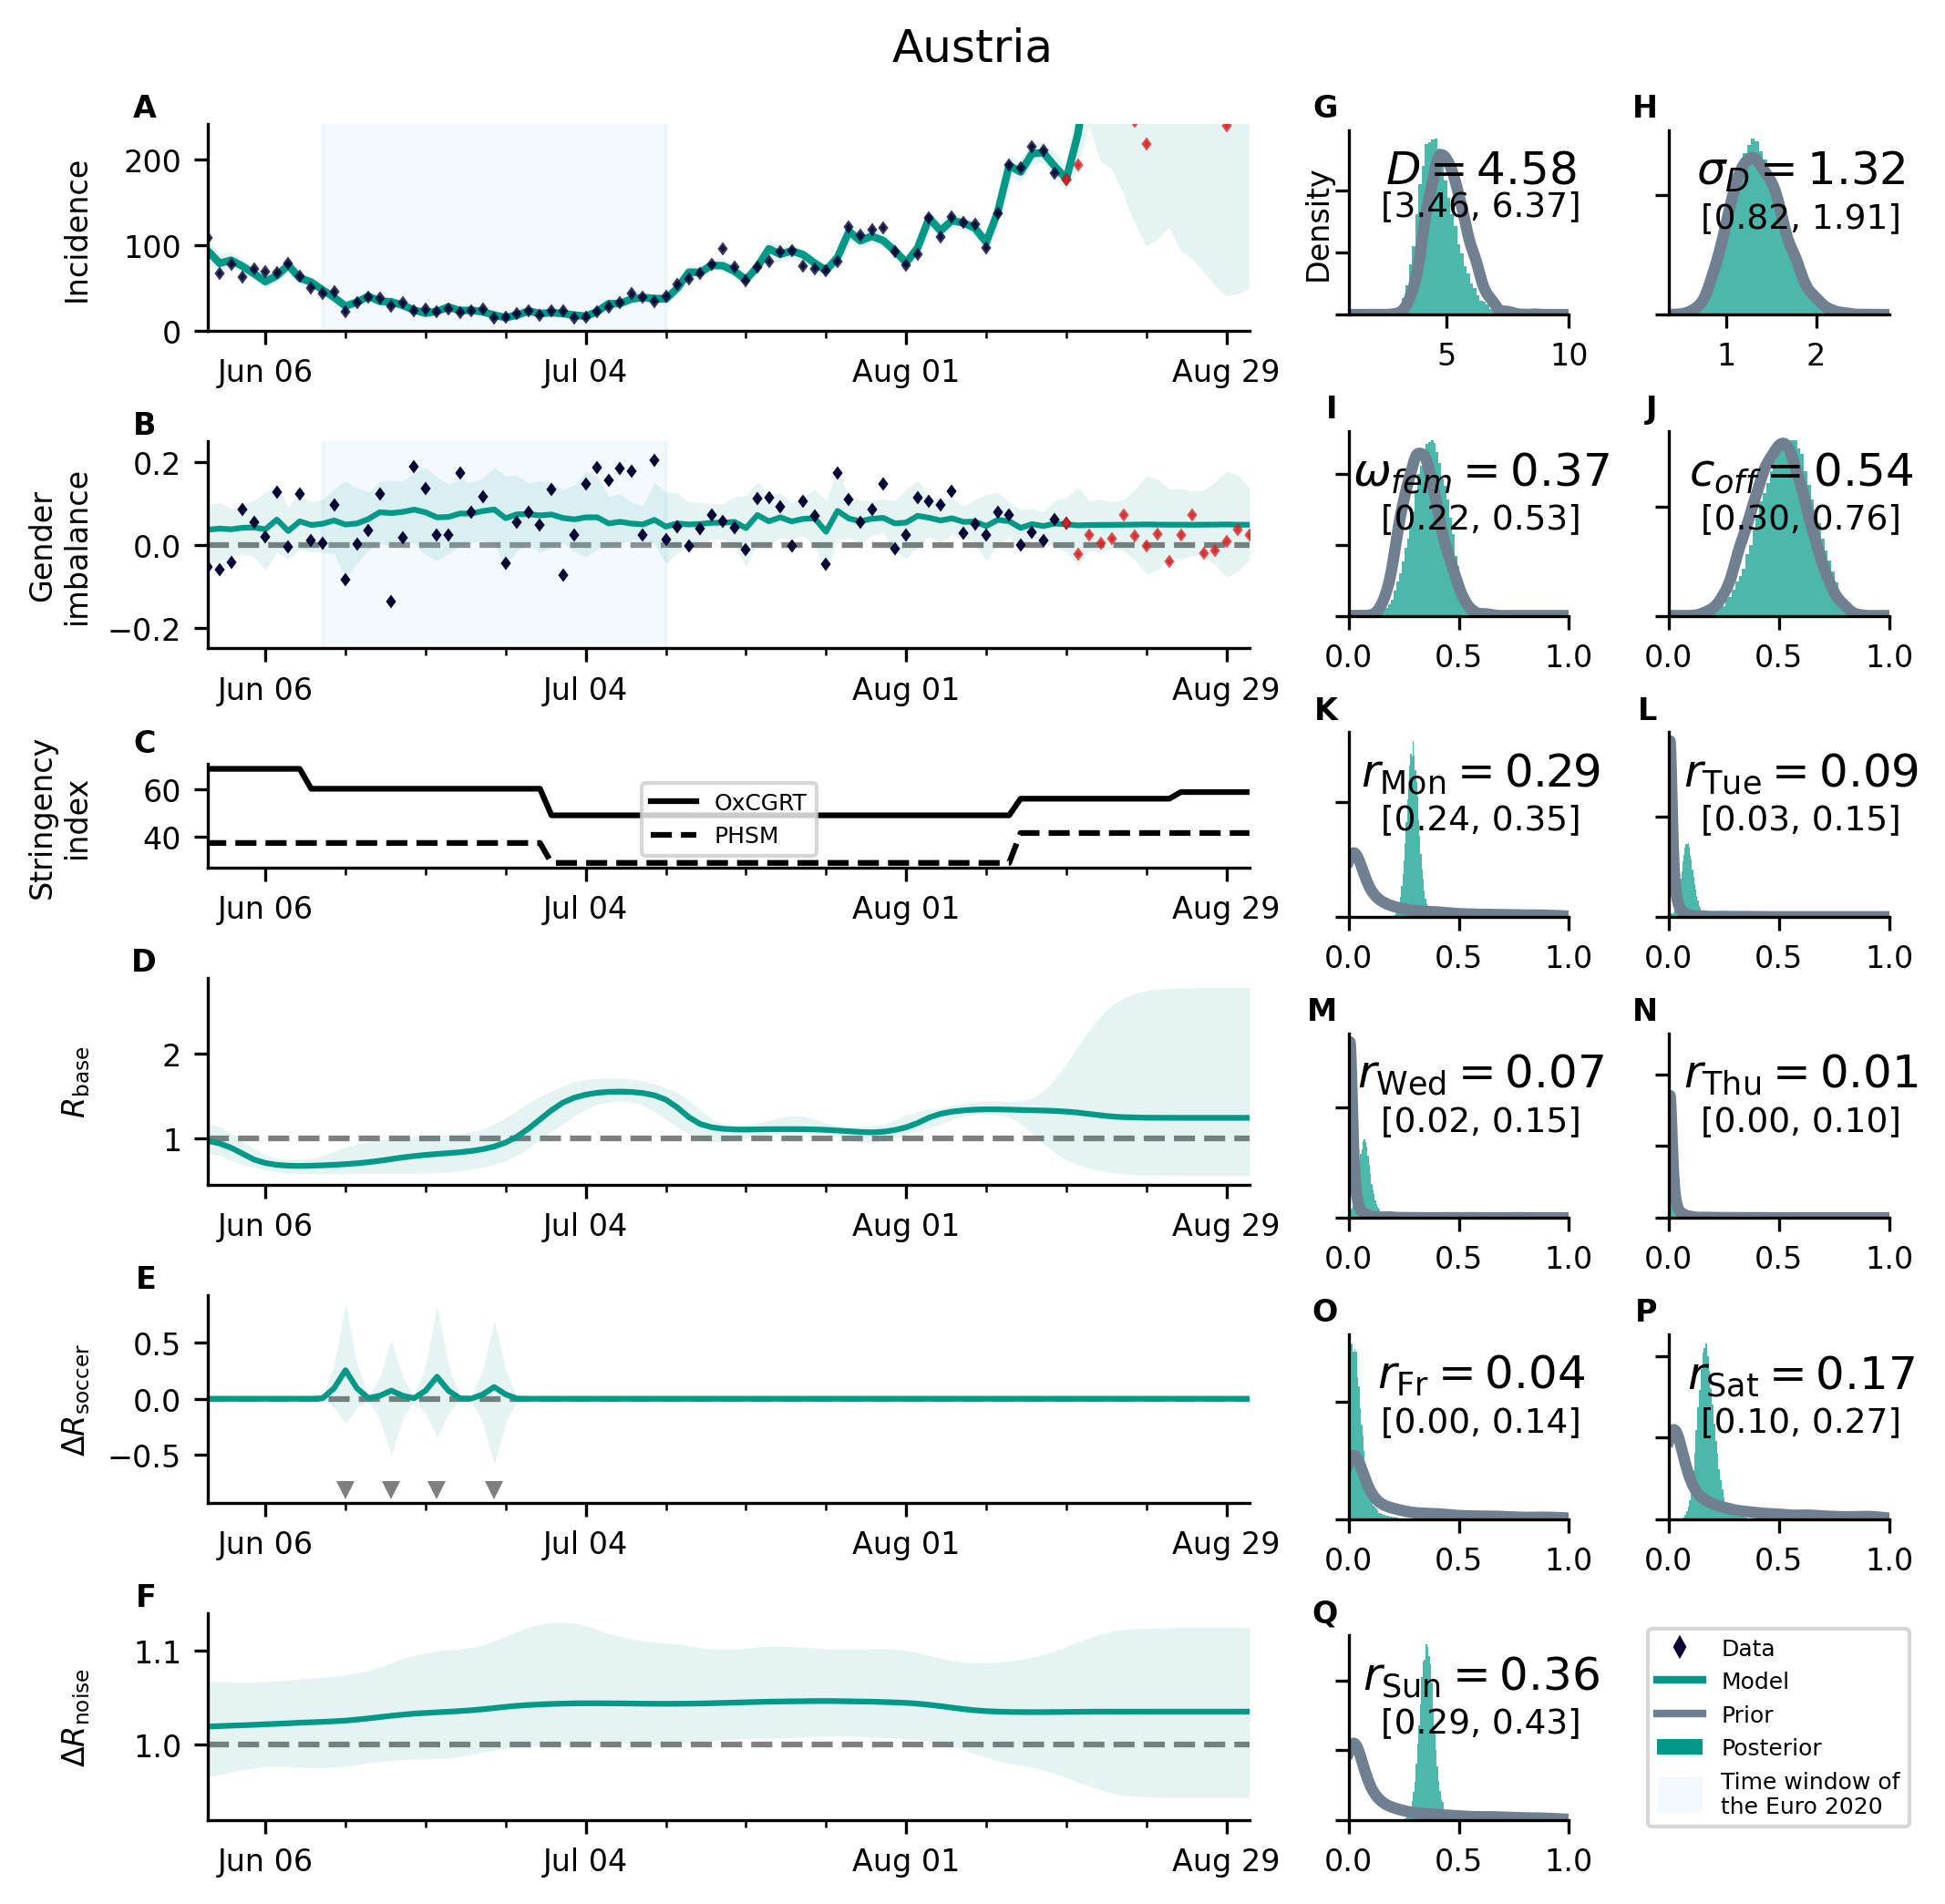

In [5]:
from covid19_soccer.plot.overview import single_extended,single_extended_v2

country2ylim_inbalance = {
    "England": [-0.15,0.3],
    "Scotland": [-0.15,0.45],
    "Slovakia": [-0.6,0.6],
    "Italy": [-0.3,0.45],
    "Czechia": [-0.3,0.45]
}

for trace,model,dl in zip(traces,models,dls):

    country = dl.countries[0]
    
    if  country in country2ylim_inbalance:
        ylim_imbalance = country2ylim_inbalance[country]
    else:
        ylim_imbalance = [-0.25,0.25]
    
    if country == "Italy":
        ylim_incidence=[0,220]
    else:
        ylim_incidence=None
    
    fig0 = single_extended_v2(trace, model, dl, ylim_imbalance=ylim_imbalance,ylim_incidence=ylim_incidence)
    if country == "Czechia":
        country = "Czech Republic"
    fig0.suptitle(f"{country}")

    fig0.savefig(
        f"../figures/other_countries/extended_overview_{dl.countries[0]}.pdf",
        transparent=True,
        dpi=300,
        bbox_inches='tight'
    )
    fig0.savefig(
        f"../figures/other_countries/extended_overview_{dl.countries[0]}.png",
        transparent=True,
        dpi=300,
        bbox_inches='tight'
    )
    plt.show()
    plt.close(fig=fig0)

Country	2.5	50.0	97.5	>0
England0	6.5220754682505815	9.155559895600073	15.969584286064212	1.0
Czechia9	3.321057886939955	8.539679497412735	13.116231209395849	0.99915625
Spain4	-1.1802338298038015	2.78973278333637	8.562998776740615	0.9109375
Italy8	-8.05886342020172	2.9441412226559516	13.24561007462533	0.7252547989745514
Scotland1	1.7777831626898475	2.579194667494834	3.4687416511556375	1.0
Austria11	-2.8068751994497947	1.641455615272569	5.983793876836785	0.79390625
Germany2	-2.0868851905670014	1.7027866916372325	4.520178363322348	0.865875
Slovakia5	-6.540015967893084	1.702834162002437	8.751401135309541	0.7076489028213166
France3	-0.32481532252219153	1.3009586590423612	2.993269112571439	0.9458928571428571
Belgium10	-2.4830796835310585	0.6694790426204582	4.416255949888247	0.6754375
Portugal6	-2.3408548255235044	0.24950881088137872	2.3182716811525306	0.59840625
Netherlands7	-2.2954427798508434	-1.179052377218338	-0.19176482332592967	0.01503125


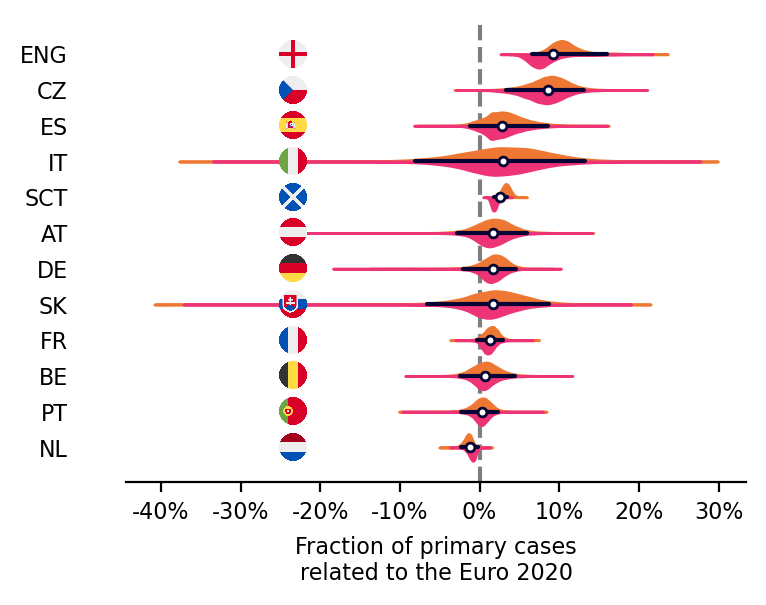

In [145]:
from covid19_soccer.plot.other import soccer_related_cases_overview

fig,ax = plt.subplots(1,1,figsize=(4,3))

soccer_related_cases_overview(
        ax,
        traces,
        models,
        dls,
        plot_flags=True,
        ypos_flags=-20,
        remove_outliers=True,
        bw=0.1,
        country_order=None,
        overall_effect_trace=None,
        vertical=True,
)
plt.show()

In [53]:
import arviz as az

In [56]:
rhats=[]
for tr in traces:
    rhats.append(az.rhat(tr))

In [74]:
for i,(rhat,country) in enumerate(zip(rhats,countries)):
    chosen_vars = []
    for var in list(rhat.data_vars):
        if "factor_female" in var:
            chosen_vars.append(var)
        if "alpha" in var:
            chosen_vars.append(var)

    rhats_R_t = []
    rhat_max = rhat.max()
    for var in chosen_vars:
        rhats_R_t.append(float(rhat_max[var]))
    rhats_all = []
    for var in rhat.data_vars:
        rhats_all.append(float(rhat_max[var]))
    print(f"{i} {country}: ({len(traces[i].posterior.chain)}, {len(traces[i].posterior.draw)})")
    print(f"\tmax rhat of R_t {max(rhats_R_t)} ")
    print(f"\tmax overall rhat {max(rhats_all)} ")

0 England: (8, 1000)
	max rhat of R_t 1.0760041531772244 
	max overall rhat 2.464389015749042 
1 Scotland: (8, 1000)
	max rhat of R_t 1.003087832539201 
	max overall rhat 1.2219455814310964 
2 Germany: (8, 1000)
	max rhat of R_t 1.0195655279837874 
	max overall rhat 1.3109391720310415 
3 France: (8, 1000)
	max rhat of R_t 1.0362409544667863 
	max overall rhat 2.5721406702614766 
4 Spain: (8, 1000)
	max rhat of R_t 1.2811186975270972 
	max overall rhat 2.778522895938584 
5 Slovakia: (8, 4000)
	max rhat of R_t 1.000800307501672 
	max overall rhat 1.1510633834839314 
6 Portugal: (8, 1000)
	max rhat of R_t 1.0027837804815447 
	max overall rhat 1.4065136454198492 
7 Netherlands: (8, 1000)
	max rhat of R_t 1.0142180895825754 
	max overall rhat 1.4504183281939171 
8 Italy: (8, 4000)
	max rhat of R_t 1.0035549870377283 
	max overall rhat 1.101509368507733 
9 Czechia: (8, 4000)
	max rhat of R_t 1.0012462581859247 
	max overall rhat 1.1594230125924612 
10 Belgium: (8, 1000)
	max rhat of R_t 1.00

In [73]:
rhats[0].max()

<xarray.Dataset>
Dimensions:                                  ()
Data variables: (12/151)
    lambda_0_log_                            float64 1.008
    lambda_1_log_                            float64 1.02
    lambda_2_log_                            float64 1.011
    lambda_3_log_                            float64 1.091
    lambda_4_log_                            float64 1.098
    lambda_5_log_                            float64 1.096
    ...                                       ...
    error_fraction                           float64 1.092
    fraction_delayed_by_weekday              float64 2.464
    fraction_delayed                         float64 2.337
    delayed_cases_by_weekday                 float64 1.158
    new_cases                                float64 1.158
    sigma_obs                                float64 1.107